# Data Scientist Professional Practical Exam Submission

# Report Summary
This summary should provide an over the top view of the approach taken to solve the problem. The approach is divided into steps as defined by grading rubric and requirements for clarity. Each step is documented as a bullet point. For more in depth view and ratification, please see the below codes. 

**Data Validation:** 
- **Recipe**: Set as index, no missing values, no cleaning required.
- **Category**: Unique Values: 11 (Changed to 10), Modification: 'Chicken Breast' revised to 'Chicken', one hot encoded subsequently.
- **Servings**: Unique Values: 6 (Changed to 4), Modification: Transformed character to integer, Label Encoded.
- **High Traffic**: Missing Values: 373 (Not at random), Modification: Replaced null with 'Low', encoded as 1 (High) and 0 (Not High).
- **Calories, Carbohydrate, Sugar, Protein**: Non-null Values: 895, Modification: Box Cox for statistical Analysis, scaled using StandardScaler.

**Exploratory Data Analysis:**
- Created several single variable boxplots, and kde plots to better understand variable correlations.
- Plotted heatmaps, pairplots, and bar charts to individually understand each variable, and each category, with each grouping.
- Conducted t-test and chi2-test to evaluate significance of each column in the dataset in relation to the target variable.

**Data Preprocessing:**
- Feature Engineered a new column 'healthy' based on WHO classifications of what kind of meals are healthy.
- Preprocessed the categorical variables by label encoding servings, and one hot encoding categories.
- Preprocessed numeric variables by StandardScaler.

**Modelling:**
Initially, the task was undertaken with the Logistic Regression model in mind. Then, a variety of models were implemented, including KNN, RandomForests, Naive Bayes etc. Among those options, Linear Support Vector Classification model and Logistic Regression Model performed the best, and then were passsed on to be hyperparameter tuned by GridSearchCV. Once the models were finalised, the classification reports were made for the Model Evaluation step to be conducted.

**Model Evaluation:**
We are selecting F1 Score, Precision, and Recall for the evaluation. The F1 Score is a harmonic mean of accuracy and recall. accuracy evaluates the percentage of real positives among retrieved positives, while recall measures the percentage of true negatives among retrieved negatives.

By using the Logistic Regression model, the Precision, Recall, and F1 Score of High Traffic are 0.80, 0.79, 0.79, and by using the Linear Support Vector Classification model, they are 0.79, 0.78, 0.78. This indicates that, if very slightly, the Logistic Regression model has less error in predicting values and fits the features better.

**Business Impact:**
There are two objectives for the business:
1. Determine which recipes will receive a lot of traffic; 
2. With an 80% likelihood, estimate which recipes will have "High" traffic values.
Due to its high rates of precision, recall, and an F1 Score that is almost or equivalent to 80%, the logistic regression model has succeeded in achieving both objectives.

The company's goal is to predict large traffic volumes more accurately. In order to evaluate the two models once more, we would therefore think about utilising the accuracy of predictions that indicated heavy traffic as a KPI. The model performs better the greater the percentage. While the Linear SVC model has an accuracy of 76%, the Logistic Regression model has 77% accuracy.

We highly recommend Tasty Bytes to prioritize monitoring the ROC-AUC metric as well. The reasons will be explained in the report below.

**Recommendations:**
Tasty Bytes should take into consideration the recommendations below to help achieve better results when it comes to conducting analysis and making accurate predictions.

- We may use this Logistic Regression Model in production to assist the Product Manager in forecasting the high traffic of the recipes. Approximately 77% of the predictions made by using this algorithm will ensure that traffic is high. This will boost the confidence of the product manager in driving greater visitors to the remainder of the website.
- Gathering Data: It is advised to gather a larger dataset in order to improve the accuracy of the model. This will give the model a more robust foundation for training and validation, increasing the predictive capacity of the system. Adding extra metrics to a recipe, such as "ingredients," "difficulty," "time to make," and "cost," should also be taken into consideration because these can affect the recipe's popularity.
- Searching for the most cost-effective and performance-oriented solutions to implement this paradigm. For ease of use and security, it is best to use this machine learning model on edge devices and test it on recently hired product analysts.
- Establish a mechanism for routinely retraining models. To preserve the model's predicted accuracy—which may fluctuate over time—it is imperative to feed it with the most recent data.

**Conclusion:**
After a thorough review of the model and data preprocessing, the Logistic Regression model was chosen to predict recipes with high traffic. The meticulous methodology employed throughout every stage guarantees a model that is optimised, assessed, and prepared for implementation. This project not only achieves the objective of precisely forecasting recipes with high traffic, but it also establishes a methodical framework for next machine learning assignments in this field. The suggestions made here make it easier to optimise the content that is shown to visitors with the goal of increasing traffic and user engagement.

# 1: Data Validation: 

Check for inconsistencies and any missing values in the columns, and prepare it for EDA, and modelling.

In [592]:
# Importing packages here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [593]:
# Read the data
df = pd.read_csv("recipe_site_traffic_2212.csv")
df

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN
...,...,...,...,...,...,...,...,...
942,943,1161.00,5.31,22.39,44.22,Lunch/Snacks,2,NaN
943,944,NaN,NaN,NaN,NaN,Potato,2,High
944,945,951.74,29.42,3.57,13.87,Pork,2,High
945,946,266.61,35.77,0.97,8.07,Potato,6,High


This data set has 947 rows, 8 columns. We have validated all variables and made several changes after validation: remove rows with null values in calories, carbohydrate, sugar, protein and replace null values in high_traffic with "Low".

- recipe: 947 unique identifiers without missing values (895 after dataset cleaning). No cleaning is needed.
- calories: 895 non-null values. We fill 39 missing values with the median grouped by category and servings.
- carbohydrate: 895 non-null values. We fill 39 missing values with the median grouped by category and servings.
- sugar: 895 non-null values. We fill 39 missing values with the median grouped by category and servings.
- protein: 895 non-null values. We fill 39 missing values with the median grouped by category and servings.
- category: 11 unique values without missing values, whereas there were 10 values in the description. The extra valie is 'Chicken Breast'. We united it with the 'Chicken' value.
- servings: 6 unique values without missing values. By description, it should be numeric variable, but now it's character. Has two extra values: '4 as a snack' and '6 as a snack'. We united them with '4' and '6' and changed the column's type to integer.
- high_traffic: only 1 non-null value ("High"). Replaced null values with "Low".

13 rows are dropped. These rows have 5 columns with null values, and hence, were deemed to definitively be useless.


In [594]:
df.recipe.nunique()

947

In [595]:
# Set index to recipe variable
df = df.set_index("recipe")

## Handling Duplicate Rows
We can see that there are 23 duplicate rows, we would prefer to further analyse the dataset before deciding to drop them. 

In [596]:
# Count duplicate rows
duplicate_count = df.duplicated().sum()

# Display the count of duplicate rows
print("Number of duplicate rows:", duplicate_count)

Number of duplicate rows: 23


## Handling Missing Values

Approximately 5.49% of data is missing in the collective numeric columns, considering the option of imputation using statistical measures like median based on groupings of category and servings. Given the skewness of the data, utilizing the mean for imputing missing values may lead to biased estimates as the mean is sensitive to outliers and extreme values. On the other hand, the median, being a more robust measure of central tendency, remains unaffected by outliers and provides a more accurate reflection of the dataset's central tendency. Therefore, median imputation is chosen as a more reliable method to handle missing values in this scenario.

In [597]:
# See how many nan value rows for each column
nan_counts = df.isnull().sum()
print("Number of NaN values in each column:")
print(nan_counts)

rows = 0
nan_counts_specific_columns = df[['calories', 'carbohydrate', 'sugar', 'protein']].isnull().sum(axis=1)
for i in nan_counts_specific_columns:
    if i == 4:
        rows = rows + 1
# Display the number of rows where specified columns have NaN values
print("Number of rows with NaN values in 'calories', 'carbohydrate', 'sugar', and 'protein':" + str(rows))

rows = 0
nan_counts_specific_columns = df[['calories', 'carbohydrate', 'sugar', 'protein', 'high_traffic']].isnull().sum(axis=1)
for i in nan_counts_specific_columns:
    if i == 5:
        rows = rows + 1
# Display the number of rows where specified columns have NaN values
print("Number of rows with NaN values in 'calories', 'carbohydrate', 'sugar', 'protein', and 'high_traffic':" + str(rows))

Number of NaN values in each column:
calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64
Number of rows with NaN values in 'calories', 'carbohydrate', 'sugar', and 'protein':52
Number of rows with NaN values in 'calories', 'carbohydrate', 'sugar', 'protein', and 'high_traffic':13


It seems that whenever null values occur they always show up in the form of all 4 colunms of 'calories', 'carbohydrate', 'sugar', 'protein' being missing. Since these values heavily depend on the food material on the recipe, it may not be appropriate to impute them. However, it is clear that 13 rows do not even indicate whether these null valued rows contribute to high traffic or not, so we can confidently drop those 13 rows.

In [598]:
# Drop 13 rows here
df = df.dropna(subset=['calories', 'carbohydrate', 'sugar', 'protein', 'high_traffic'], how='all')
nan_counts = df.isnull().sum()
print("Number of NaN values in each column:")
print(nan_counts)

Number of NaN values in each column:
calories         39
carbohydrate     39
sugar            39
protein          39
category          0
servings          0
high_traffic    360
dtype: int64


In [599]:
# Create a pivot table for null values by category
pivot_table_null_values = pd.pivot_table(df, index='category', values=['calories', 'carbohydrate', 'sugar', 'protein'], aggfunc=lambda x: x.isnull().sum())

# Display the pivot table
print("Null Values Pivot Table by Category:")
print(pivot_table_null_values)

Null Values Pivot Table by Category:
                calories  carbohydrate  protein  sugar
category                                              
Beverages              0             0        0      0
Breakfast              0             0        0      0
Chicken                2             2        2      2
Chicken Breast         2             2        2      2
Dessert                5             5        5      5
Lunch/Snacks           5             5        5      5
Meat                   3             3        3      3
One Dish Meal          1             1        1      1
Pork                  11            11       11     11
Potato                 5             5        5      5
Vegetable              5             5        5      5


We can see above that 'Pork' has the maximum rows with null values and 'Chicken' has the least
We can safely assume that similar categories of recipes will have similar food specifications. Hence we can impute the column values with category specific metrics. We should be careful to see that the more servings that are there in any recipe, logically the metrics for the health specs vary accordingly. We can test to see this through a pivot table.

In [600]:
# Create a pivot table for medians by category and servings
pivot_table_medians = pd.pivot_table(df, index='category', columns='servings', values=['calories', 'carbohydrate', 'sugar', 'protein'], aggfunc='median')
pivot_table_medians.to_csv('pivot_cat_serve.csv')
# Display the pivot table
print("Medians Pivot Table by Category and Servings:")
print(pivot_table_medians)

Medians Pivot Table by Category and Servings:
               calories                    ...        sugar                     
servings              1        2        4  ... 4 as a snack       6 6 as a snack
category                                   ...                                  
Beverages       154.465  199.340  129.450  ...          NaN   6.470          NaN
Breakfast       253.465  313.530  166.850  ...          NaN   8.860          NaN
Chicken         309.670  452.510  377.595  ...          NaN   3.170          NaN
Chicken Breast  518.530  314.600  347.060  ...          NaN   4.010          NaN
Dessert         263.920  239.900  290.220  ...          NaN  29.700          NaN
Lunch/Snacks    515.490  362.780  299.140  ...        12.17   2.945         5.78
Meat            641.050  504.200  452.395  ...          NaN   4.750          NaN
One Dish Meal   557.660  436.715  372.270  ...          NaN   4.400          NaN
Pork            416.010  391.745  388.440  ...          NaN   2

## Servings column
We can see something peculiar in the columns, and further inspecting the 'servings' column we get:
- Entries like '4 as a snack' and '6 as a snack' include additional text, which likely results in the column being of type 'object'.
- Recommendations: Clean these entries to extract the numerical part, converting the entire column to a numerical type for better analysis and processing.


In [601]:
df.servings.value_counts()

4               382
6               195
2               181
1               173
4 as a snack      2
6 as a snack      1
Name: servings, dtype: int64

'4 as a snack' and '6 as a snack' are not significant in amount, and hence, will be merged with 4 and 6 correspondingly.

In [602]:
# Define a function to extract numeric values
def extract_numeric(value):
    try:
        return int(''.join(filter(str.isdigit, str(value))))
    except ValueError:
        return None

# Apply the function to the 'servings' column
df['servings'] = df['servings'].apply(extract_numeric)

df.servings.value_counts()

4    384
6    196
2    181
1    173
Name: servings, dtype: int64

## Vetting the Category Column
It seems there are categories in 'category' that are repeating but do not have the same name, like 'chicken' and 'chicken breast'. My initial intuition was to merge the categories, but then upon further inspection, we can see that the contribution that the categories have to the dataset is not insignificant. Hence thought to leave the category column as it is, rather than merge it. Same was considered for 'Pork' in correlation to 'Meat', and 'Potato' in correlation to 'Vegetable'. 

However, revisiting the problem statement document, we notice that the data should not have a category titled 'Chicken Breast' at all. It is not in the product manager's notes. Hence, will perform that operation on 'Chicken' only as an exception due to the given document. It is specifically stated that there are 10 categories : 'Lunch/Snacks', 'Beverages', 'Potato', 'Vegetable', 'Meat', 'Chicken', 'Pork', 'Dessert', 'Breakfast', 'One
Dish Meal'

In [603]:
df.category.value_counts()

Breakfast         106
Chicken Breast     96
Beverages          92
Potato             88
Lunch/Snacks       87
Pork               84
Vegetable          83
Dessert            82
Meat               77
Chicken            71
One Dish Meal      68
Name: category, dtype: int64

In [604]:
df.category.nunique()

11

In [605]:
# Replace 'chicken breast' with 'chicken' in the 'category' column
df['category'] = df['category'].replace('Chicken Breast', 'Chicken')

# Display the updated DataFrame
print(df['category'].value_counts())

Chicken          167
Breakfast        106
Beverages         92
Potato            88
Lunch/Snacks      87
Pork              84
Vegetable         83
Dessert           82
Meat              77
One Dish Meal     68
Name: category, dtype: int64


In [606]:
print(df.category.nunique())

10


#### Continuing work on imputations...
The median imputation is performed group-wise based on the 'category' and 'servings' columns to account for the heterogeneity in nutritional content across different categories and serving sizes. This approach ensures that the imputed values are contextually relevant and in alignment with the inherent structure of the dataset.

In [607]:
# Create a pivot table for medians by category and servings
pivot_table_medians = pd.pivot_table(df, index='category', columns='servings', values=['calories', 'carbohydrate', 'sugar', 'protein'], aggfunc='median')
pivot_table_medians.to_csv('pivot_cat_serve.csv')
# Display the pivot table
print("Medians Pivot Table by Category and Servings:")
print(pivot_table_medians)

Medians Pivot Table by Category and Servings:
              calories                    ...   sugar                
servings             1        2        4  ...       2       4       6
category                                  ...                        
Beverages      154.465  199.340  129.450  ...   7.580   9.885   6.470
Breakfast      253.465  313.530  166.850  ...   5.430   4.540   8.860
Chicken        393.730  384.960  368.490  ...   3.990   4.140   3.610
Dessert        263.920  239.900  290.220  ...  23.190  20.930  29.700
Lunch/Snacks   515.490  362.780  301.490  ...   1.890   2.970   3.380
Meat           641.050  504.200  452.395  ...   7.790   2.750   4.750
One Dish Meal  557.660  436.715  372.270  ...   2.365   7.600   4.400
Pork           416.010  391.745  388.440  ...   5.065   5.900   2.530
Potato         394.165  267.605  327.690  ...   2.520   2.645   3.230
Vegetable      164.300  115.000  107.710  ...   3.400   4.500   4.335

[10 rows x 16 columns]


Having saved the pivot table as csv and upon inspecting it further, we find that that is not the case. Increasing servings does not in fact affect any of the metrics of calories, proteins, sugars, or carbohydrates. Still, the median seems to provide a consistent understanding of the categorical health metrics. We can confirm this with boxplots for each of the categories and corresponding servings.

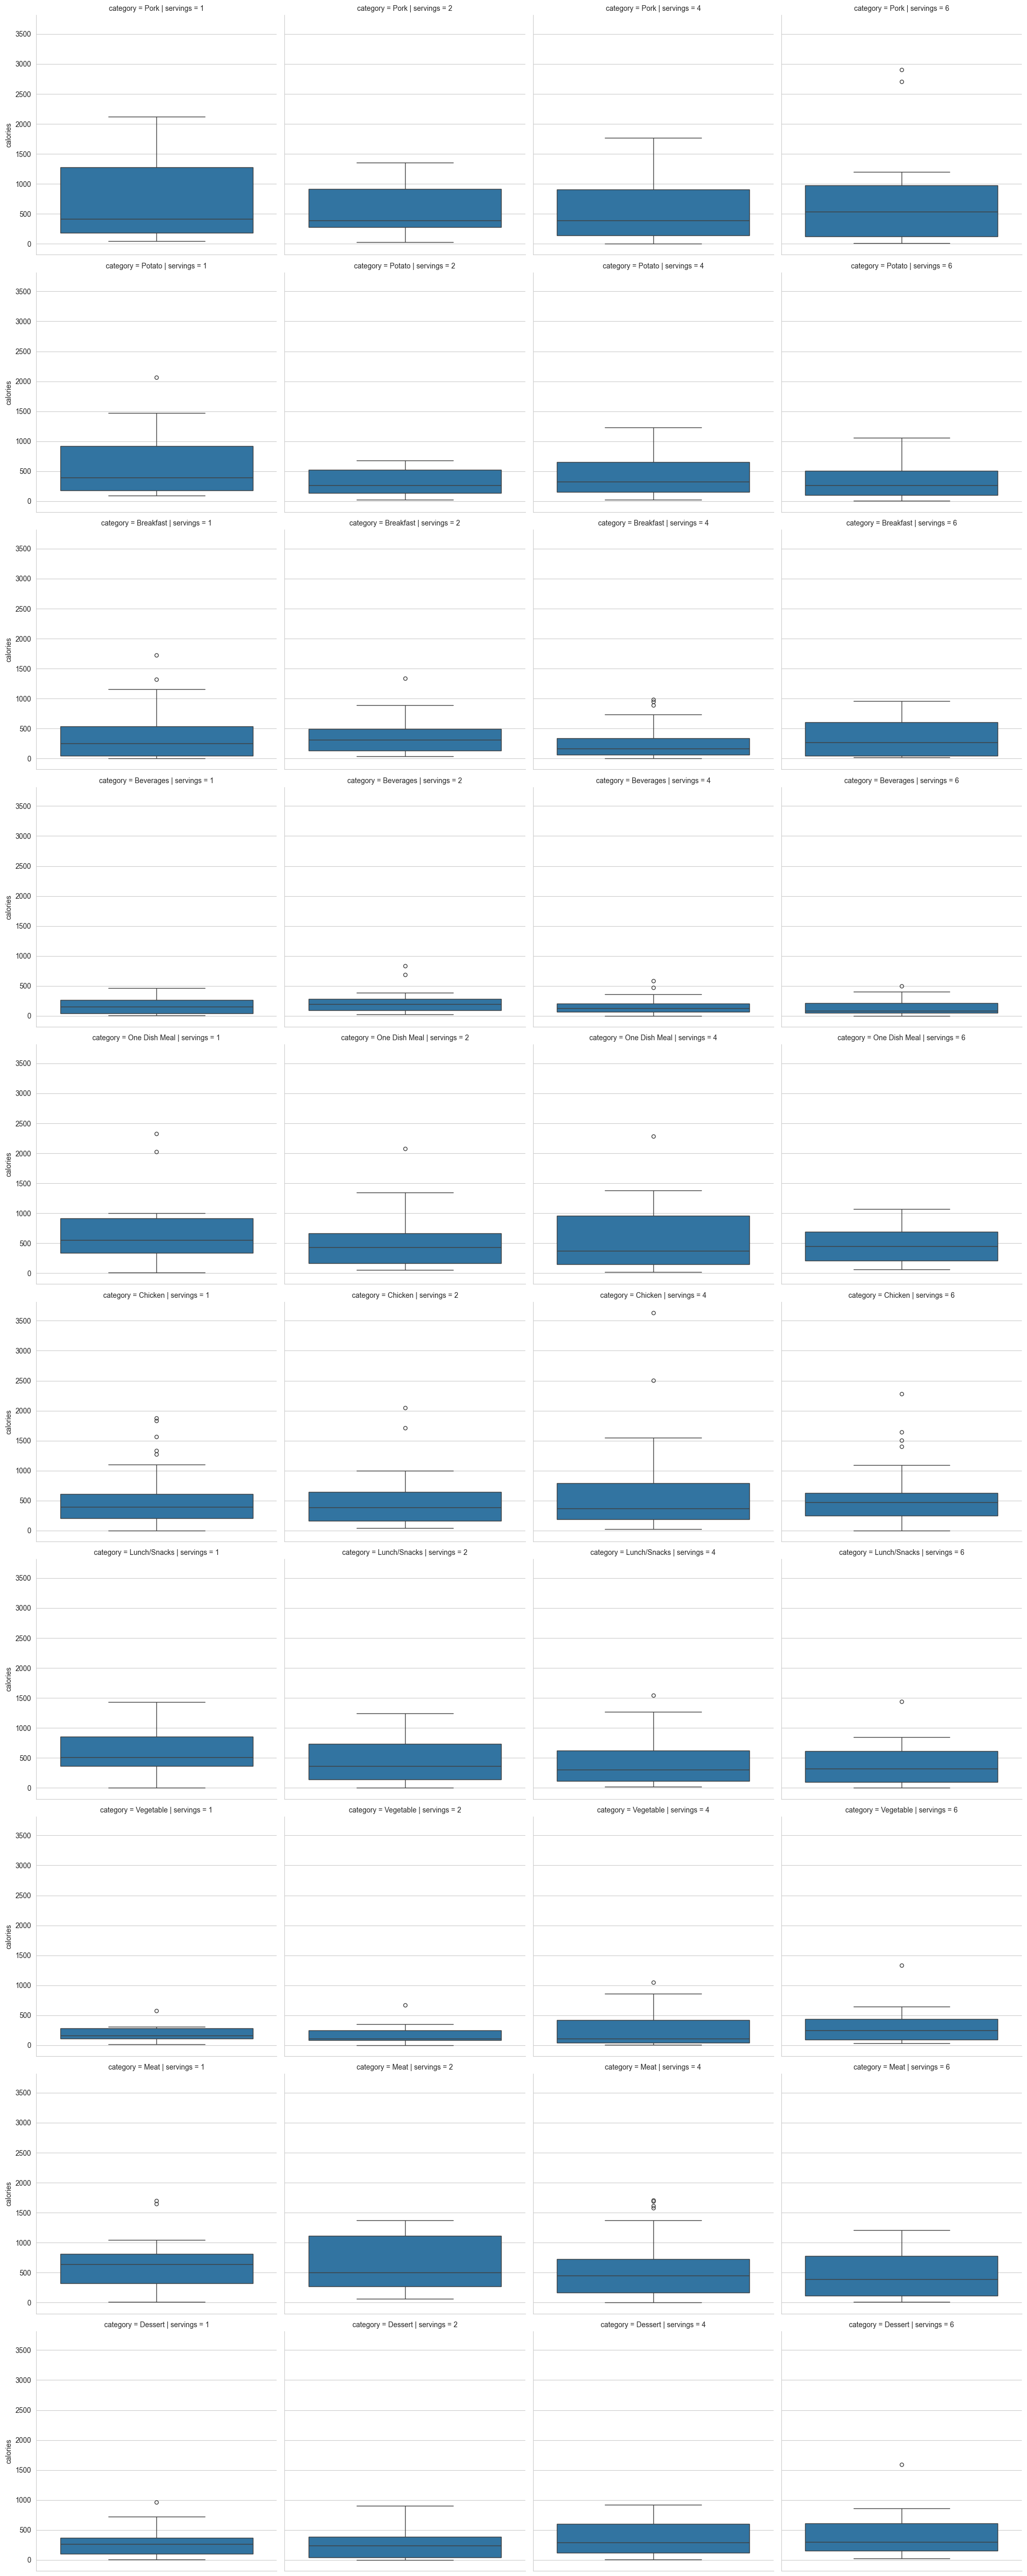

In [608]:
sns.catplot(kind = "box", data = df, row = "category", col = "servings", y = "calories")
plt.show()

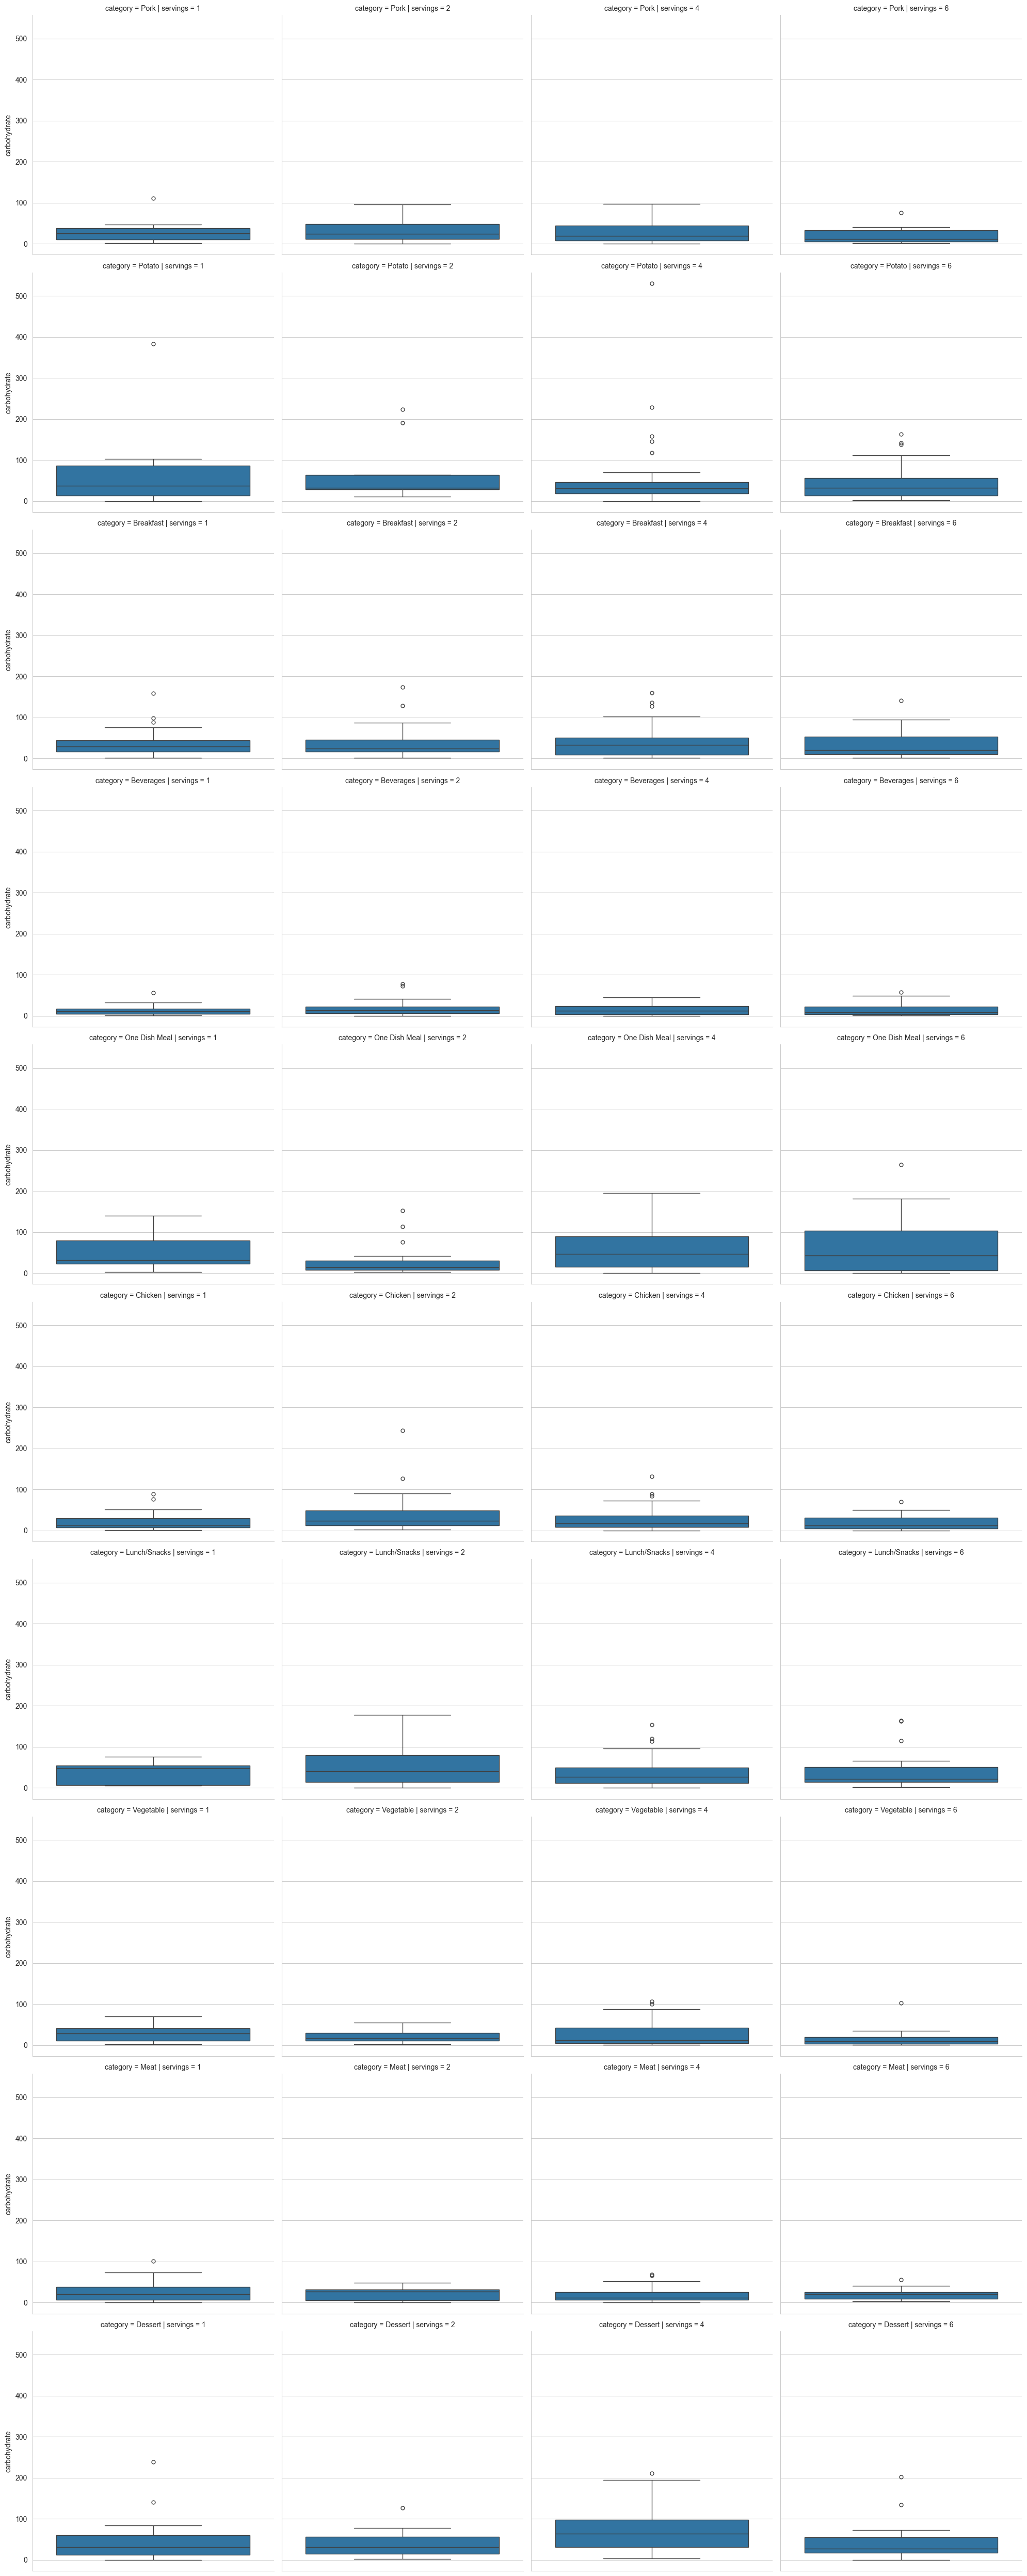

In [609]:
sns.catplot(kind = "box", data = df, row = "category", col = "servings", y = "carbohydrate")
plt.show()

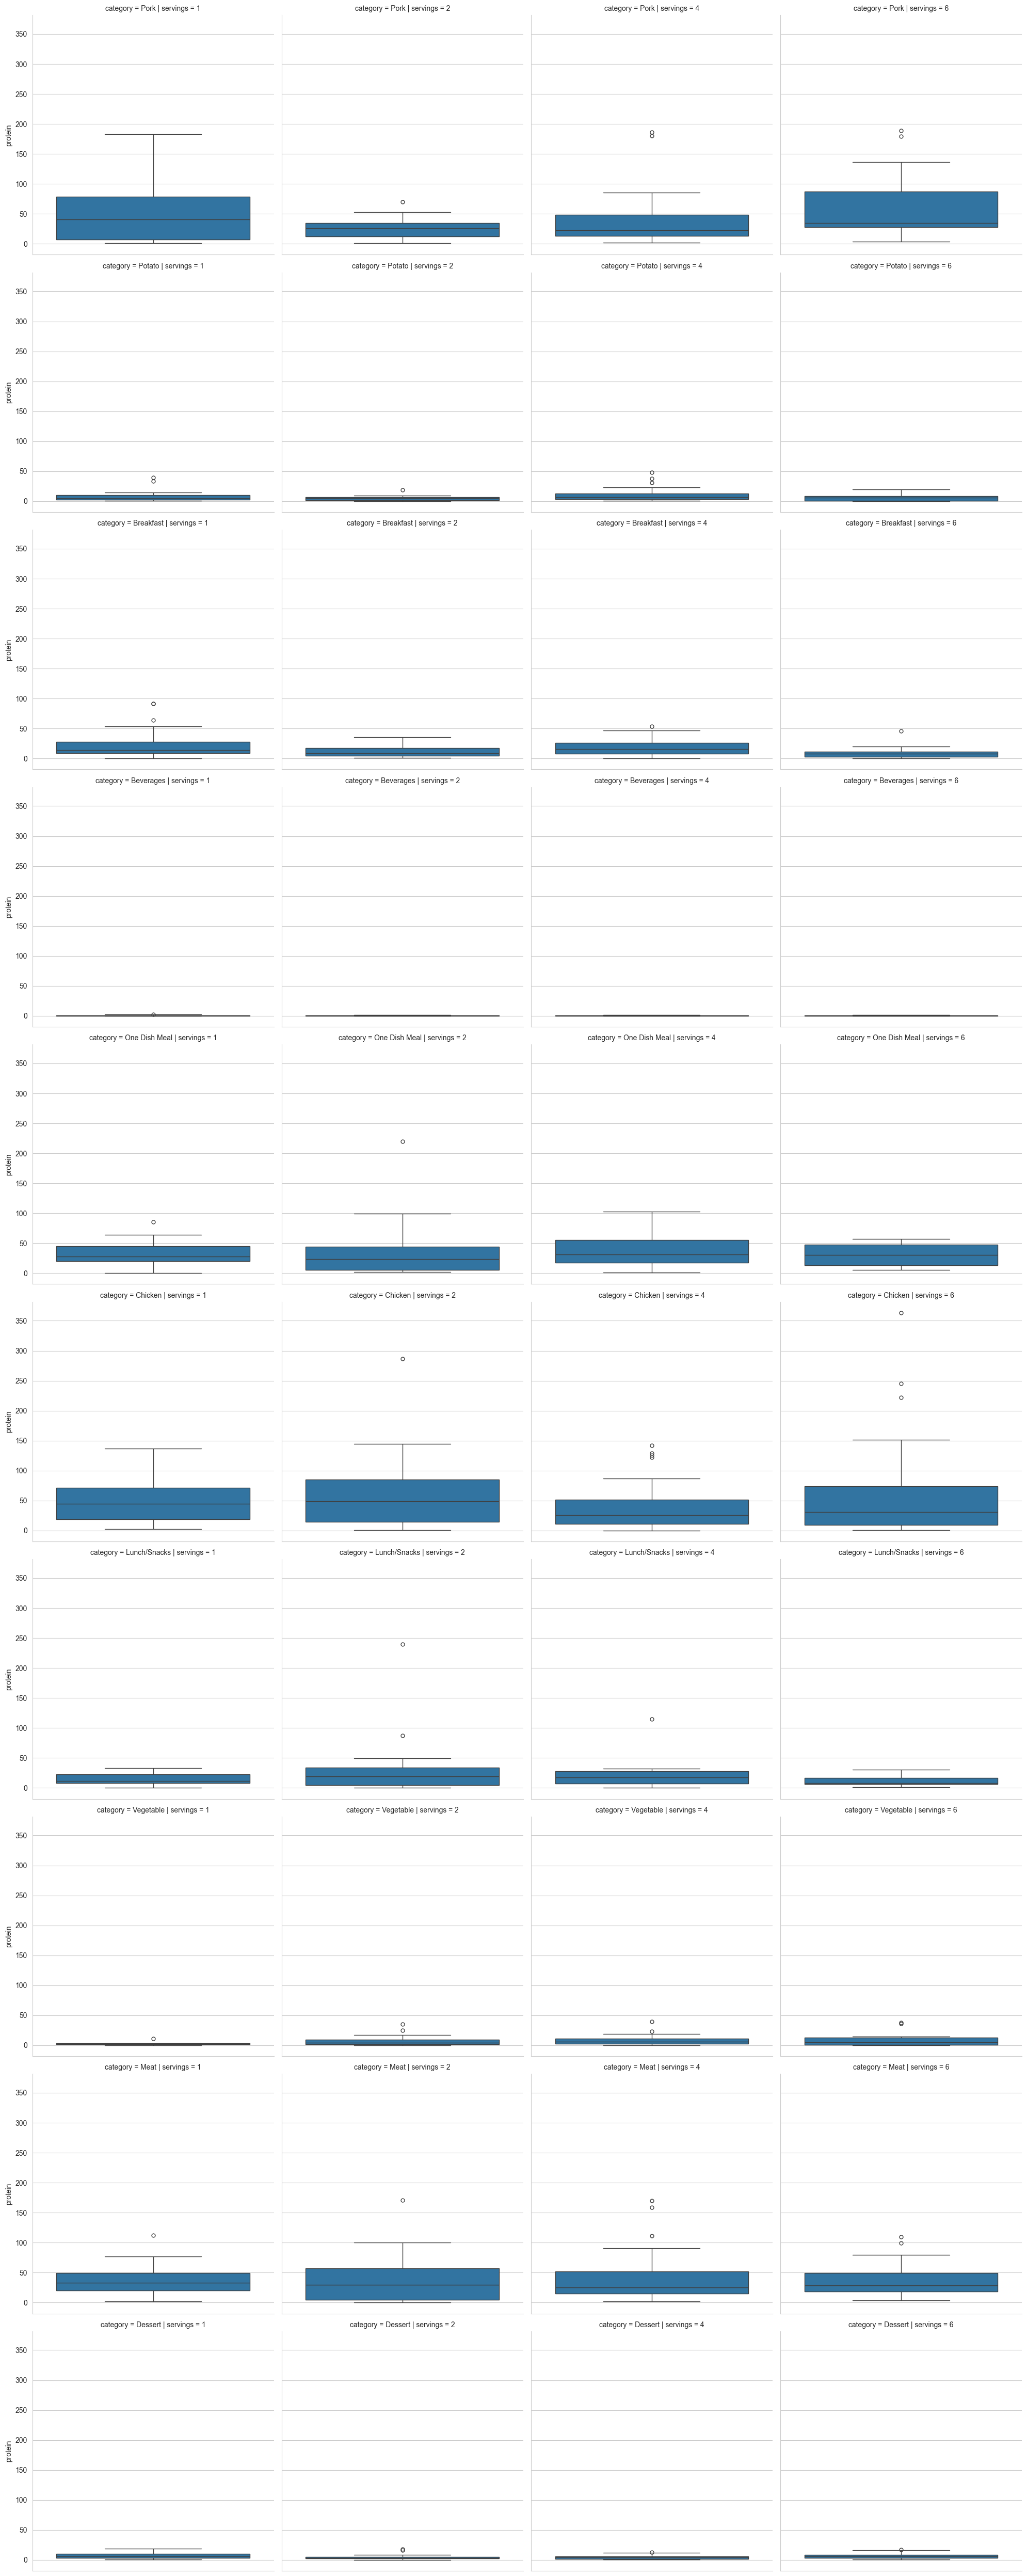

In [610]:
sns.catplot(kind = "box", data = df, row = "category", col = "servings", y = "protein")
plt.show()

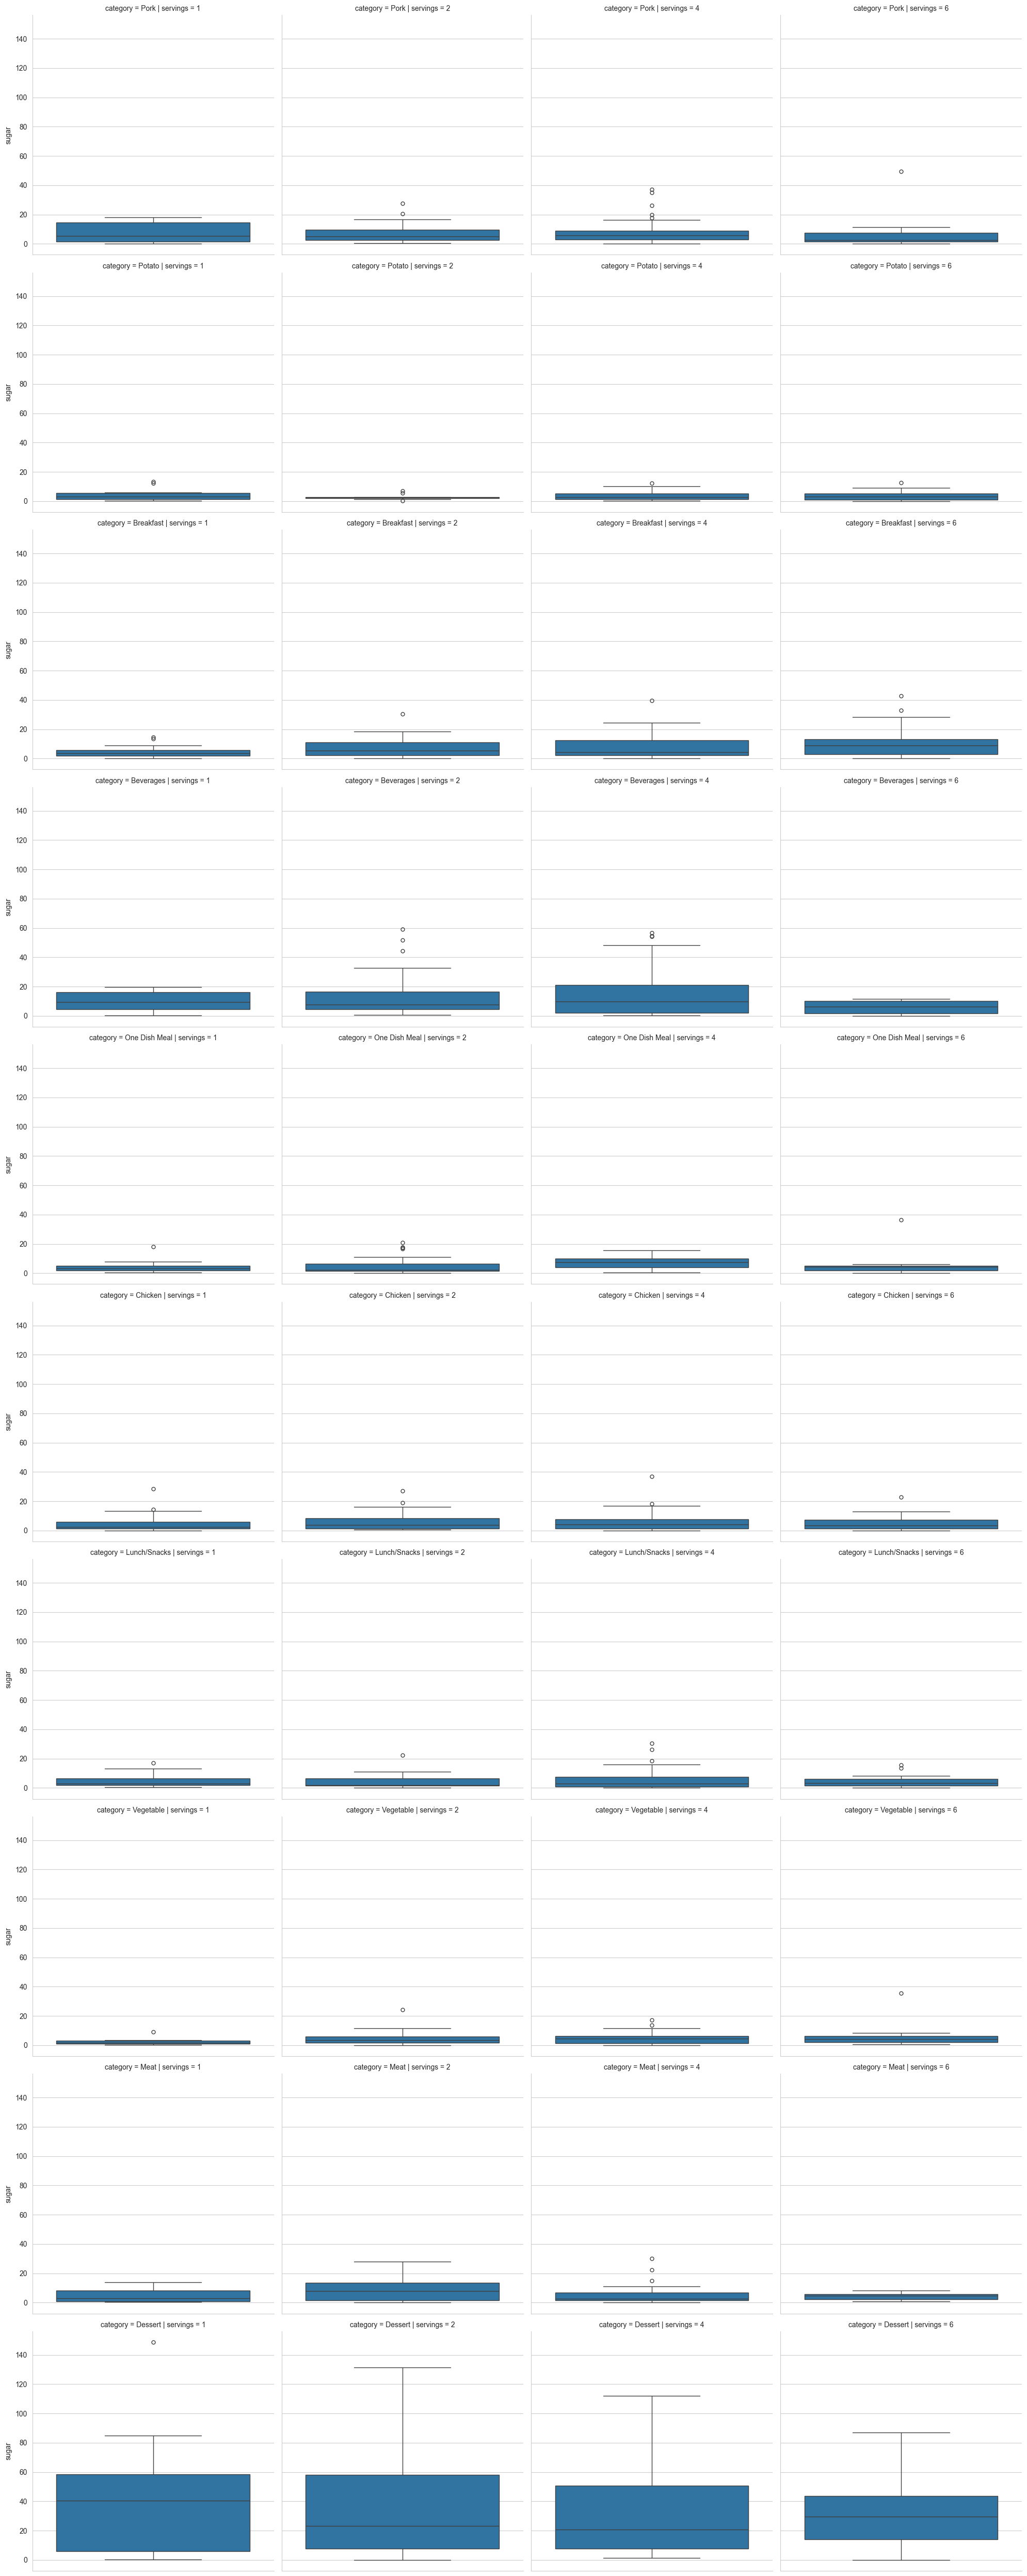

In [611]:
sns.catplot(kind = "box", data = df, row = "category", col = "servings", y = "sugar")
plt.show()

We do not find a concerning number of outliers in any of the (category | servings) plots shown above. Hence, we can safely impute the 39 rows with their corresponding (category | servings) pairs.

In [612]:
# Finally imputing the values for the rows
imp_table = pivot_table_medians.stack()

def imp(row, col):
    if pd.isnull(row[col]):
        return imp_table.loc[(row['category'],row['servings']),col]
    return row[col]

for index, row in df.iterrows():
    row["calories"] = imp(row, "calories")
    row["carbohydrate"] = imp(row, "carbohydrate")
    row["protein"] = imp(row, "protein")
    row["sugar"] = imp(row, "sugar")
    
    df.loc[index] = row
    
df

,calories,carbohydrate,sugar,protein,category,servings,high_traffic
recipe,,,,,,,
1,538.520,11.830,2.53,35.120,Pork,6,High
2,35.480,38.560,0.66,0.920,Potato,4,High
3,914.280,42.680,3.09,2.880,Breakfast,1,NaN
4,97.030,30.560,38.63,0.020,Beverages,4,High
5,27.050,1.850,0.80,0.530,Beverages,4,NaN
...,...,...,...,...,...,...,...
943,1161.000,5.310,22.39,44.220,Lunch/Snacks,2,NaN
944,267.605,32.045,2.52,5.145,Potato,2,High
945,951.740,29.420,3.57,13.870,Pork,2,High


In [613]:
# Count duplicate rows
duplicate_count = df.duplicated().sum()

# Display the count of duplicate rows
print("Number of duplicate rows:", duplicate_count)

Number of duplicate rows: 20


Revisiting the duplicate values, we see that after handling missing values and data validation, it has reduced to 20. We can safely drop these rows.

In [614]:
df.drop_duplicates(inplace= True)
df.shape

(914, 7)

## Create Binary Classification Problem
For creating a Binary Classification Problem we must have an antithesis to the 'High' result of the 'high_traffic' column. A significant portion, 40%, of the high_traffic column data is missing. Hence, it is safe to assume, we should be able to accept all null values as being 'Low'. Keep in mind that errors can easily creep in here. For example, if a high traffic recipe fails to be documented, we might end up with data that describes High traffic recipe as nan. But for our problem with current dataset we will impute all nans in target variable with Low, just so our models have a contrast to compare it with.

It is also unclear what High traffic is defined as, hence, a variable level of traffic could come in as High or Low traffic when actual data is surveyed from the website. This is a prime example of when data collection should be done with extreme care, as all corresponding analysis can be affected significantly by it.

In [615]:
# Learn more about the high_traffic column
print(df.high_traffic.unique())
print(df.high_traffic.value_counts())
# Fill NaN values in 'high_traffic' with 'Low'
df['high_traffic'].fillna('Low', inplace=True)
df

['High' nan]
High    554
Name: high_traffic, dtype: int64


,calories,carbohydrate,sugar,protein,category,servings,high_traffic
recipe,,,,,,,
1,538.52,11.83,2.53,35.12,Pork,6,High
2,35.48,38.56,0.66,0.92,Potato,4,High
3,914.28,42.68,3.09,2.88,Breakfast,1,Low
4,97.03,30.56,38.63,0.02,Beverages,4,High
5,27.05,1.85,0.80,0.53,Beverages,4,Low
...,...,...,...,...,...,...,...
942,186.21,83.94,1.98,22.40,Chicken,4,High
943,1161.00,5.31,22.39,44.22,Lunch/Snacks,2,Low
945,951.74,29.42,3.57,13.87,Pork,2,High


In [616]:
nan_counts = df.isnull().sum()
print("Number of NaN values in each column:")
print(nan_counts)

Number of NaN values in each column:
calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
high_traffic    0
dtype: int64


In [617]:
# Save as excel file to compare and verify
df.to_csv("Cleaned.csv")

# 2: Exploratory Data Analysis

In [618]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 914 entries, 1 to 947
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   calories      914 non-null    float64
 1   carbohydrate  914 non-null    float64
 2   sugar         914 non-null    float64
 3   protein       914 non-null    float64
 4   category      914 non-null    object 
 5   servings      914 non-null    int64  
 6   high_traffic  914 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 89.4+ KB


,calories,carbohydrate,sugar,protein,servings
count,914.000000,914.000000,914.000000,914.000000,914.000000
mean,434.053446,34.857177,8.998178,24.005832,3.454048
std,448.881678,43.547894,14.574567,36.062056,1.737597
min,0.140000,0.030000,0.010000,0.000000,1.000000
25%,112.602500,8.750000,1.702500,3.262500,2.000000
50%,290.930000,21.520000,4.505000,10.800000,4.000000
75%,589.712500,44.652500,9.772500,30.340000,4.000000
max,3633.160000,530.420000,148.750000,363.360000,6.000000


## Single Variable Visualizations

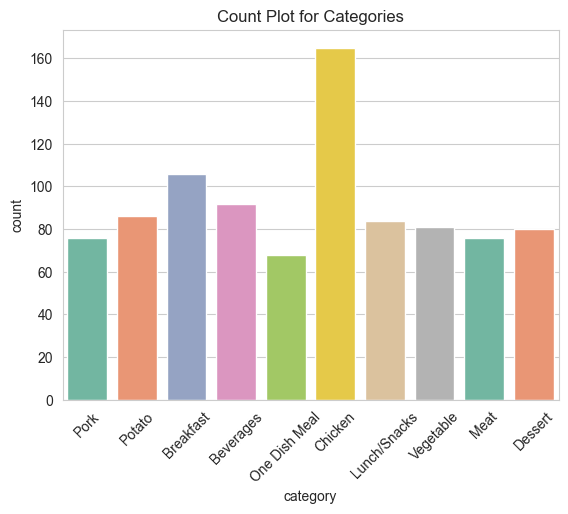

In [619]:
sns.countplot(x='category', data=df, palette='Set2')
plt.title('Count Plot for Categories')
plt.xticks(rotation = 45)
plt.show()

**CountPlot of Categories:** The most frequent category is that of "Chicken" and the least frequent is that of "One Dish Meal"

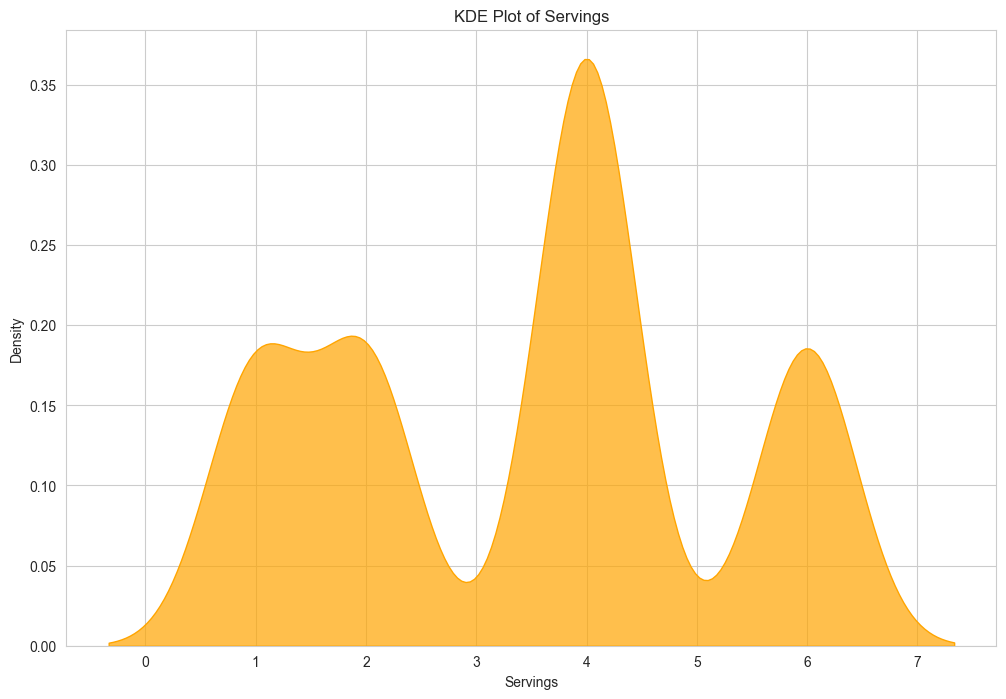

In [620]:
# KDE PLOT
plt.figure(figsize=(12, 8))
sns.kdeplot(df['servings'], fill=True, color='orange', alpha=0.7)
plt.title('KDE Plot of Servings')
plt.xlabel('Servings')
plt.ylabel('Density')
plt.show()

**Kde Plot of Servings:** We can see from the Kde plot above that the dataset generally contains more recipes that cater to servings of 4. 1,2, and 6 are comparable to each other.

We can build on this visualization by considering only the high traffic recipes. That would help us understand which serving size is popular for people.

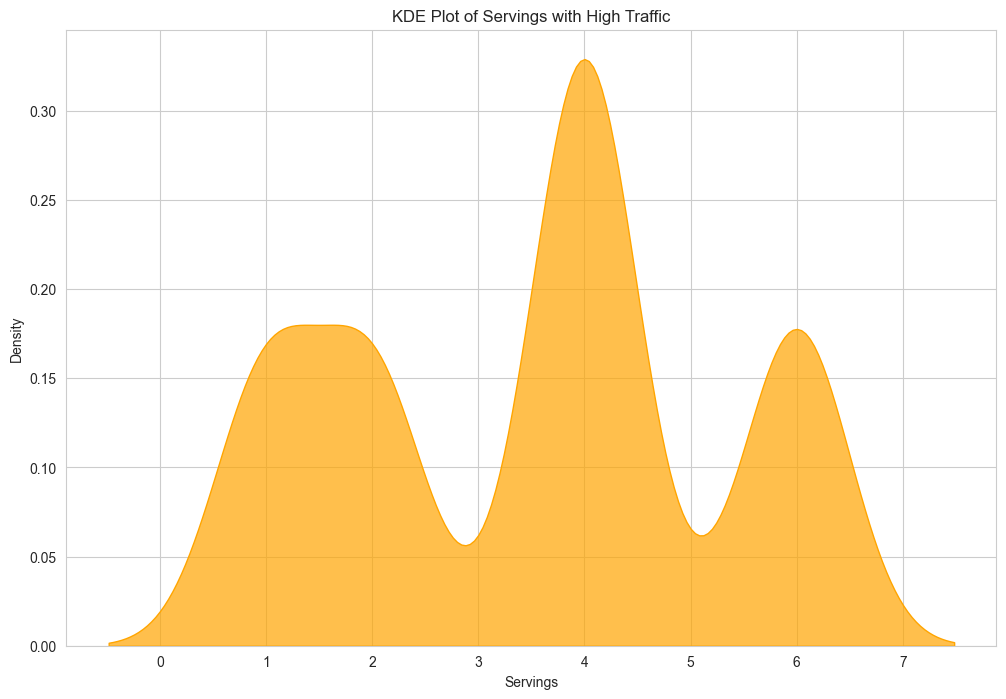

In [621]:
filtered_df = df[df['high_traffic'] == 'High']

# KDE PLOT
plt.figure(figsize=(12, 8))
sns.kdeplot(filtered_df['servings'], fill=True, color='orange', alpha=0.7)
plt.title('KDE Plot of Servings with High Traffic')
plt.xlabel('Servings')
plt.ylabel('Density')
plt.show()

Since there is not a significant difference, we learn that serving size has little to no effect on traffic That is it is safe to assume that the serving size is consistent regardless of high or low traffic.

## 2 Variable Visualizations

Fix the color mapping of each category. The color should more closely resemble it's category for easy understanding, and comparison. For example, Vegetable is marked as green.

In [622]:
# Set color map for the categories
category_colors = {
    'Vegetable': 'green',
    'Chicken': 'pink',
    'Pork': 'brown',
    'Meat': 'red',
    'Dessert': 'coral',  
    'Potato': 'burlywood',
    'Breakfast': 'blue', 
    'Beverages': 'orange', 
    'Lunch/Snacks': 'purple',  
    'One Dish Meal': 'mediumorchid'
}

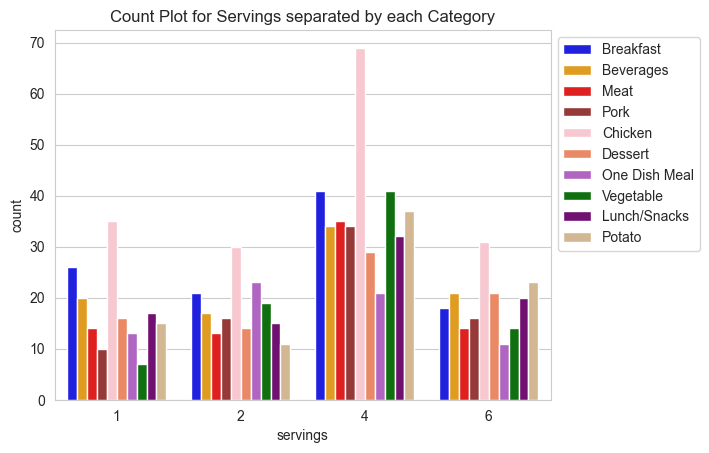

In [623]:
sns.countplot(x='servings', hue='category', data=df, palette=category_colors)
plt.title('Count Plot for Servings separated by each Category')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

**Bar Graph for Servings with Category:** As observed before, the 4 servings recipes while being the most popular, we can see that Chicken performs consistently well. We will need more insight into the categories to learn more. 

Categories such as "Beverages", "Breakfast", and "Potato" have a higher number of recipes compared to others. On the other hand, categories like "Pork" have fewer recipes. This distribution can provide insights into the type of recipes that are more prevalent on the site and which categories might need more content to diversify the offering.

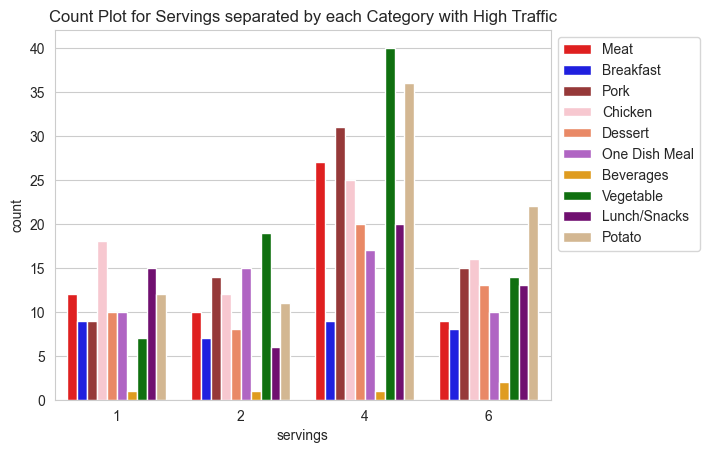

In [624]:
sns.countplot(x='servings', hue='category', data=filtered_df, palette=category_colors)
plt.title('Count Plot for Servings separated by each Category with High Traffic')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

**Filtering for High Traffic:** Vegetable and Potato seem to have a significant performance difference from the previous plot. Indicating that Vegetable recipes may be contributing to higher traffic. Same with potato.

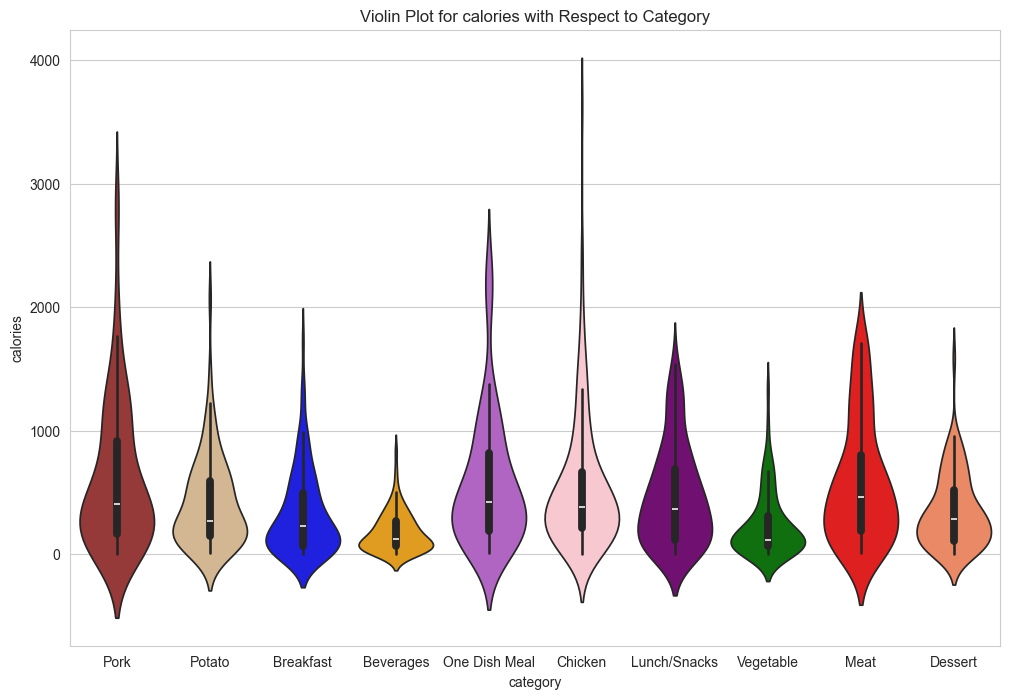

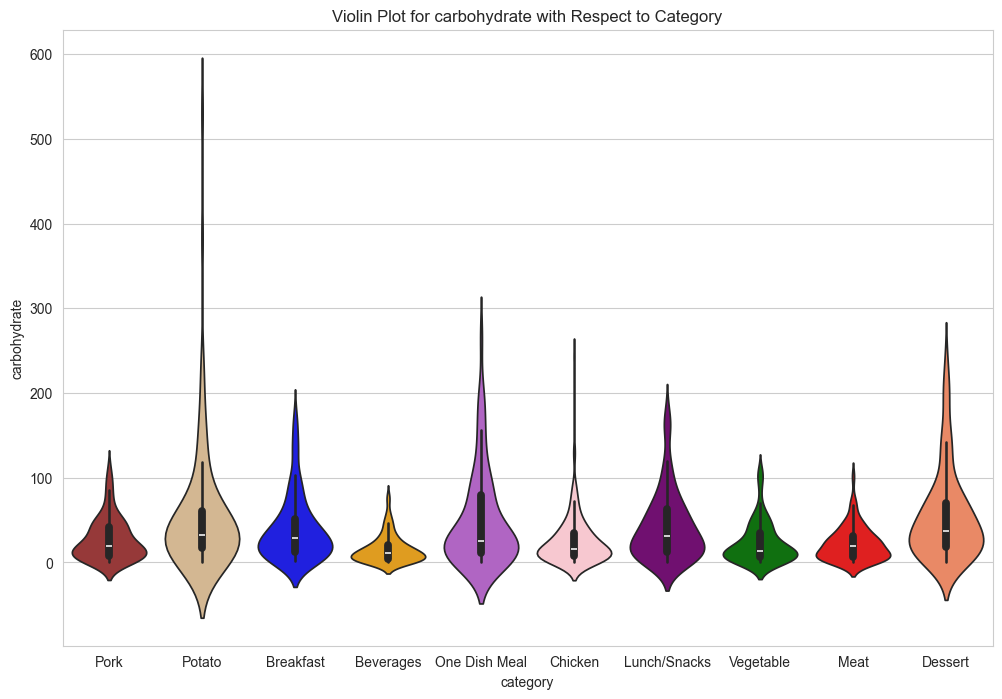

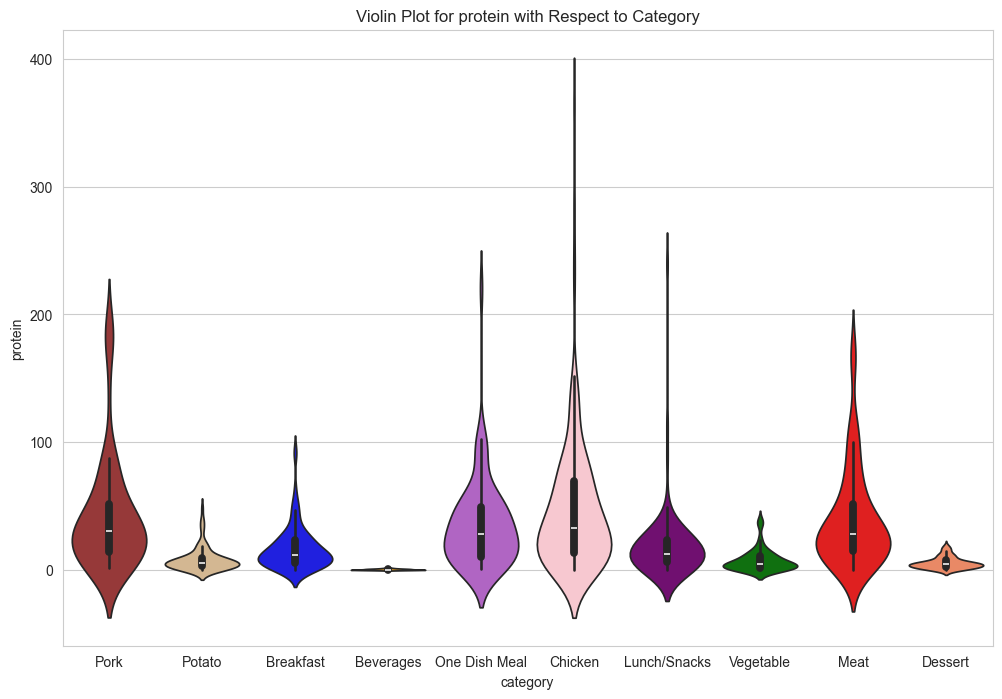

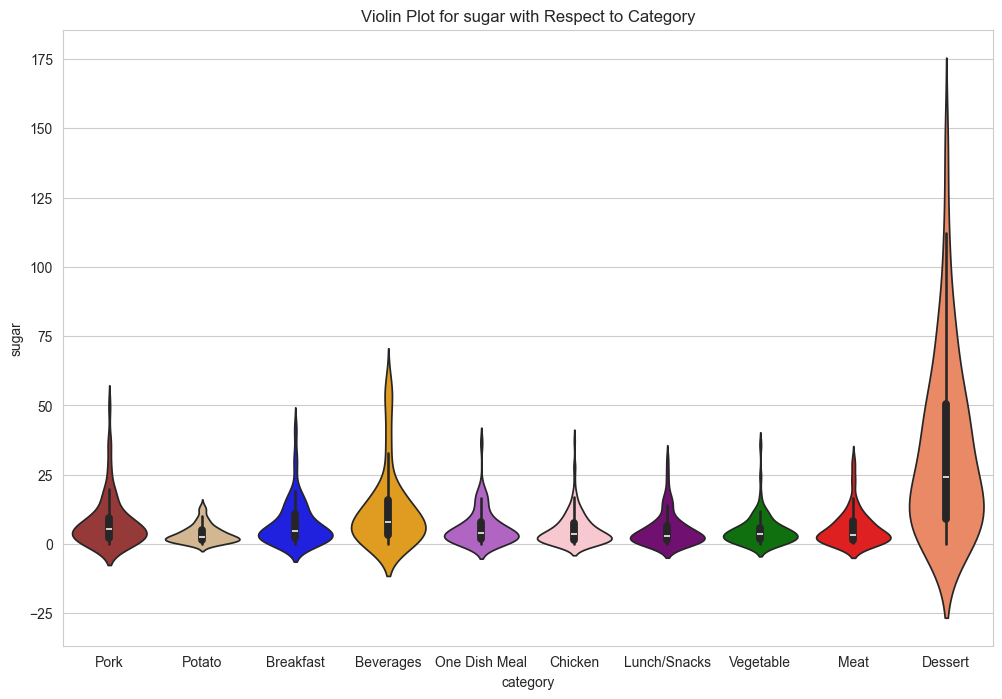

In [625]:
# Select relevant columns for the violin plots
nutrient_columns = ['calories', 'carbohydrate', 'protein', 'sugar']

# Create violin plots for each nutrient with respect to category
for nutrient in nutrient_columns:
    plt.figure(figsize=(12, 8))
    sns.violinplot(x='category', y=nutrient, data=df, palette=category_colors)
    plt.title(f'Violin Plot for {nutrient} with Respect to Category')
    plt.show()

We can see that the violinplots are consistent with logic:

**High Calorie Foods:** We can see that the high calorie recipes are generally in the category of Chicken, One Dish Meals, Pork, and Meats. Animal based recipes are generally higher calorie foods than the others.

**High Carbohydrate Foods:** We can see that high carbohydrates are observed in mainly Potatos, followed by One Dish Meals, and Desserts.

**High Protein Foods:** Similar to High Calorie Foods,High Protein Foods are generally comprised of animal based recipes. Additionally, beverages have negligible amounts of it.

**High Sugar Foods:** As expected, Desserts are exceptionally high in sugar, followed by Beverages. The rest have some values, but that depends on one's definition of carbohydrates and sugars.

## More Visualizations and Insights

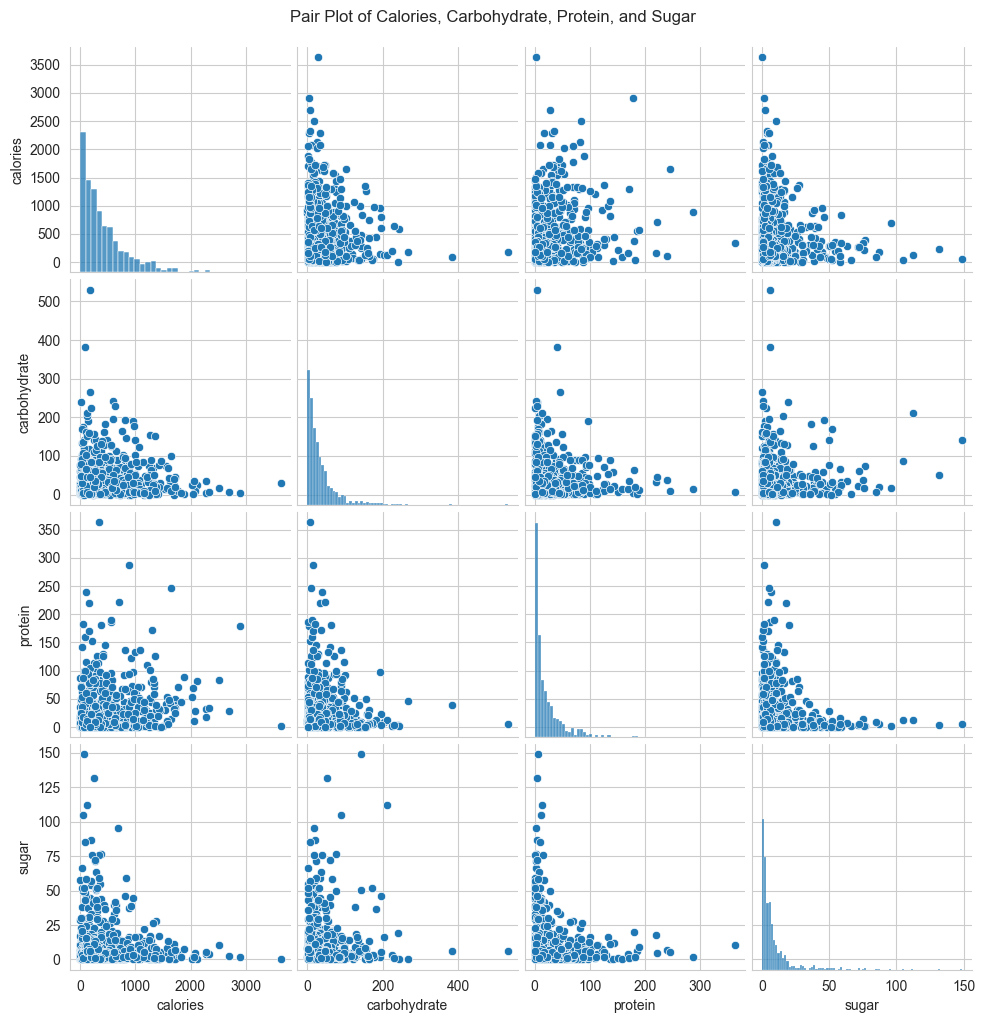

In [626]:
# Select relevant numerical columns
numerical_columns = ['calories', 'carbohydrate', 'protein', 'sugar']

# Create a pair plot
sns.pairplot(df[numerical_columns])
plt.suptitle('Pair Plot of Calories, Carbohydrate, Protein, and Sugar', y=1.02)
plt.show()

**PairPlot:** We can observe from the PairPlot that there are no linear relations between the numeric variables

- **Calories:** The distributions for both high and low traffic recipes are right-skewed, with high traffic recipes exhibiting a slightly broader spread.
- **Carbohydrate:** Right-skewed distributions are observed for both traffic types, though high traffic recipes present a more even spread.
- **Sugar:** Both traffic types exhibit highly right-skewed distributions, with a notable peak in the lower sugar range.
- **Protein:** The distributions are right-skewed, with high traffic recipes displaying a broader spread.

The histograms show that the nutritional columns labelled "calories," "carbohydrate," "protein," and "sugar" are significantly skewed. The primary cause of this skewness is the intrinsic variations in nutritional value among various food types. For example, dishes that call for meat have a higher protein level than recipes that call for vegetables.

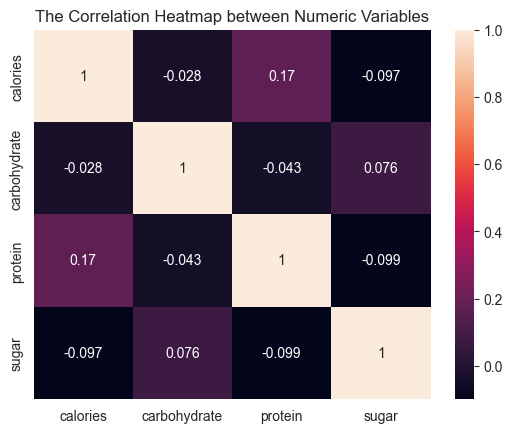

In [627]:
# Select numeric columns
numeric_columns = ['calories', 'carbohydrate', 'protein', 'sugar']
sns.heatmap(df[numeric_columns].corr(), annot=True).set(title='The Correlation Heatmap between Numeric Variables');

**Heatmap:** We are able to confirm from the above heatmap that there is in fact little to no multicollinearity within the dataset. This makes our analysis much more reliable.

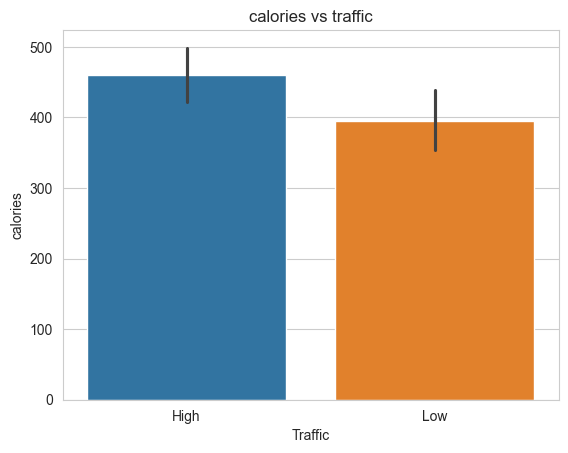

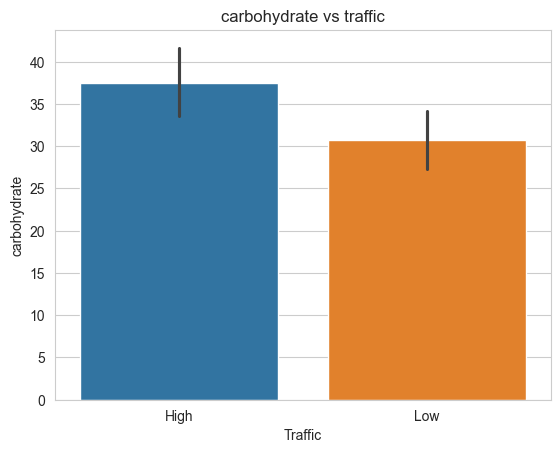

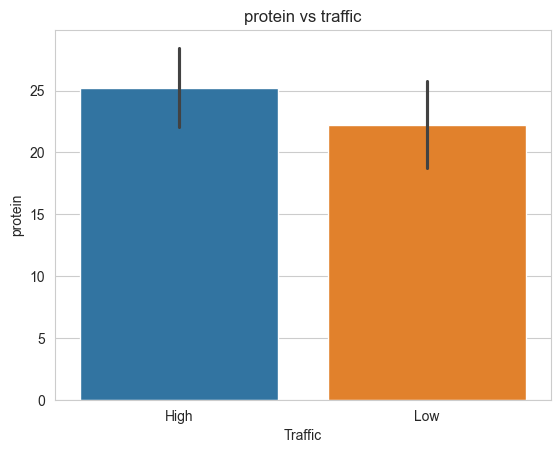

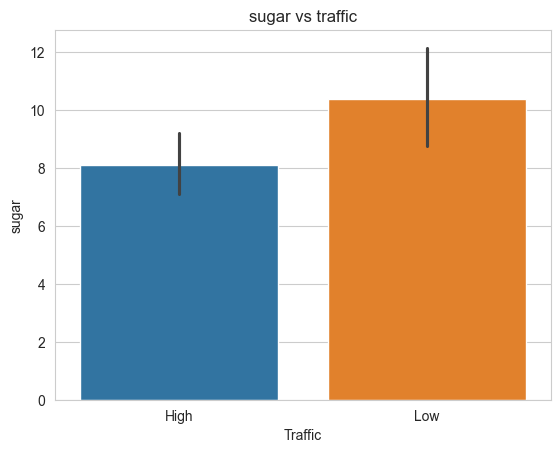

In [628]:
for col in df[numeric_columns].columns:
  bar=sns.barplot(data = df, x="high_traffic", y=col, hue = "high_traffic")
  bar.set(xlabel="Traffic", ylabel=col, title=col+' vs traffic')
  plt.show()

**Comparison of Numeric Columns with Target:** It is interesting to note that sugar does not have a strong influence on high traffic. Perhaps this is in relation to the fact that their audience may be attracted to their healthier recipes. Or perhaps it just is not that popular.

## Statistical Testing

Using Box-Cox transformation, make the numeric columns into normal distributions. 

**Benefits of Normal Distribution in Statistical Analysis:**
Adhering to a normal distribution in data analysis is beneficial for several reasons, some of which are highlighted below:
- **Statistical Power:** Compared to their non-parametric equivalents, parametric tests, which assume Gaussian distributions, have more statistical power. This suggests that they are more likely to find an effect, if one exists, which improves the analysis's accuracy and dependability.
- **Model Assumptions:** A lot of models and statistical methods work with the presumption that residuals or errors have a normal distribution. The model may produce inaccurate or unreliable estimates if this premise is broken, which would undermine the validity of the results.
- **Stabilised Variance:** Normalization-related transformations frequently result in the stabilisation of variance in the data. In some models, stabilised variance is a fundamental premise that enhances the robustness and dependability of the model's estimations.

In summation, striving for normality in data distribution is a prudent approach to ensure that the assumptions underlying many statistical models and tests

Shapiro-Wilk Test for bc_calories:
Statistic = 0.99814, p-value = 0.42481
bc_calories looks Gaussian (fail to reject H0)

Shapiro-Wilk Test for bc_carbohydrate:
Statistic = 0.99901, p-value = 0.91283
bc_carbohydrate looks Gaussian (fail to reject H0)

Shapiro-Wilk Test for bc_sugar:
Statistic = 0.99728, p-value = 0.12967
bc_sugar looks Gaussian (fail to reject H0)

Shapiro-Wilk Test for bc_protein:
Statistic = 0.99848, p-value = 0.62091
bc_protein looks Gaussian (fail to reject H0)



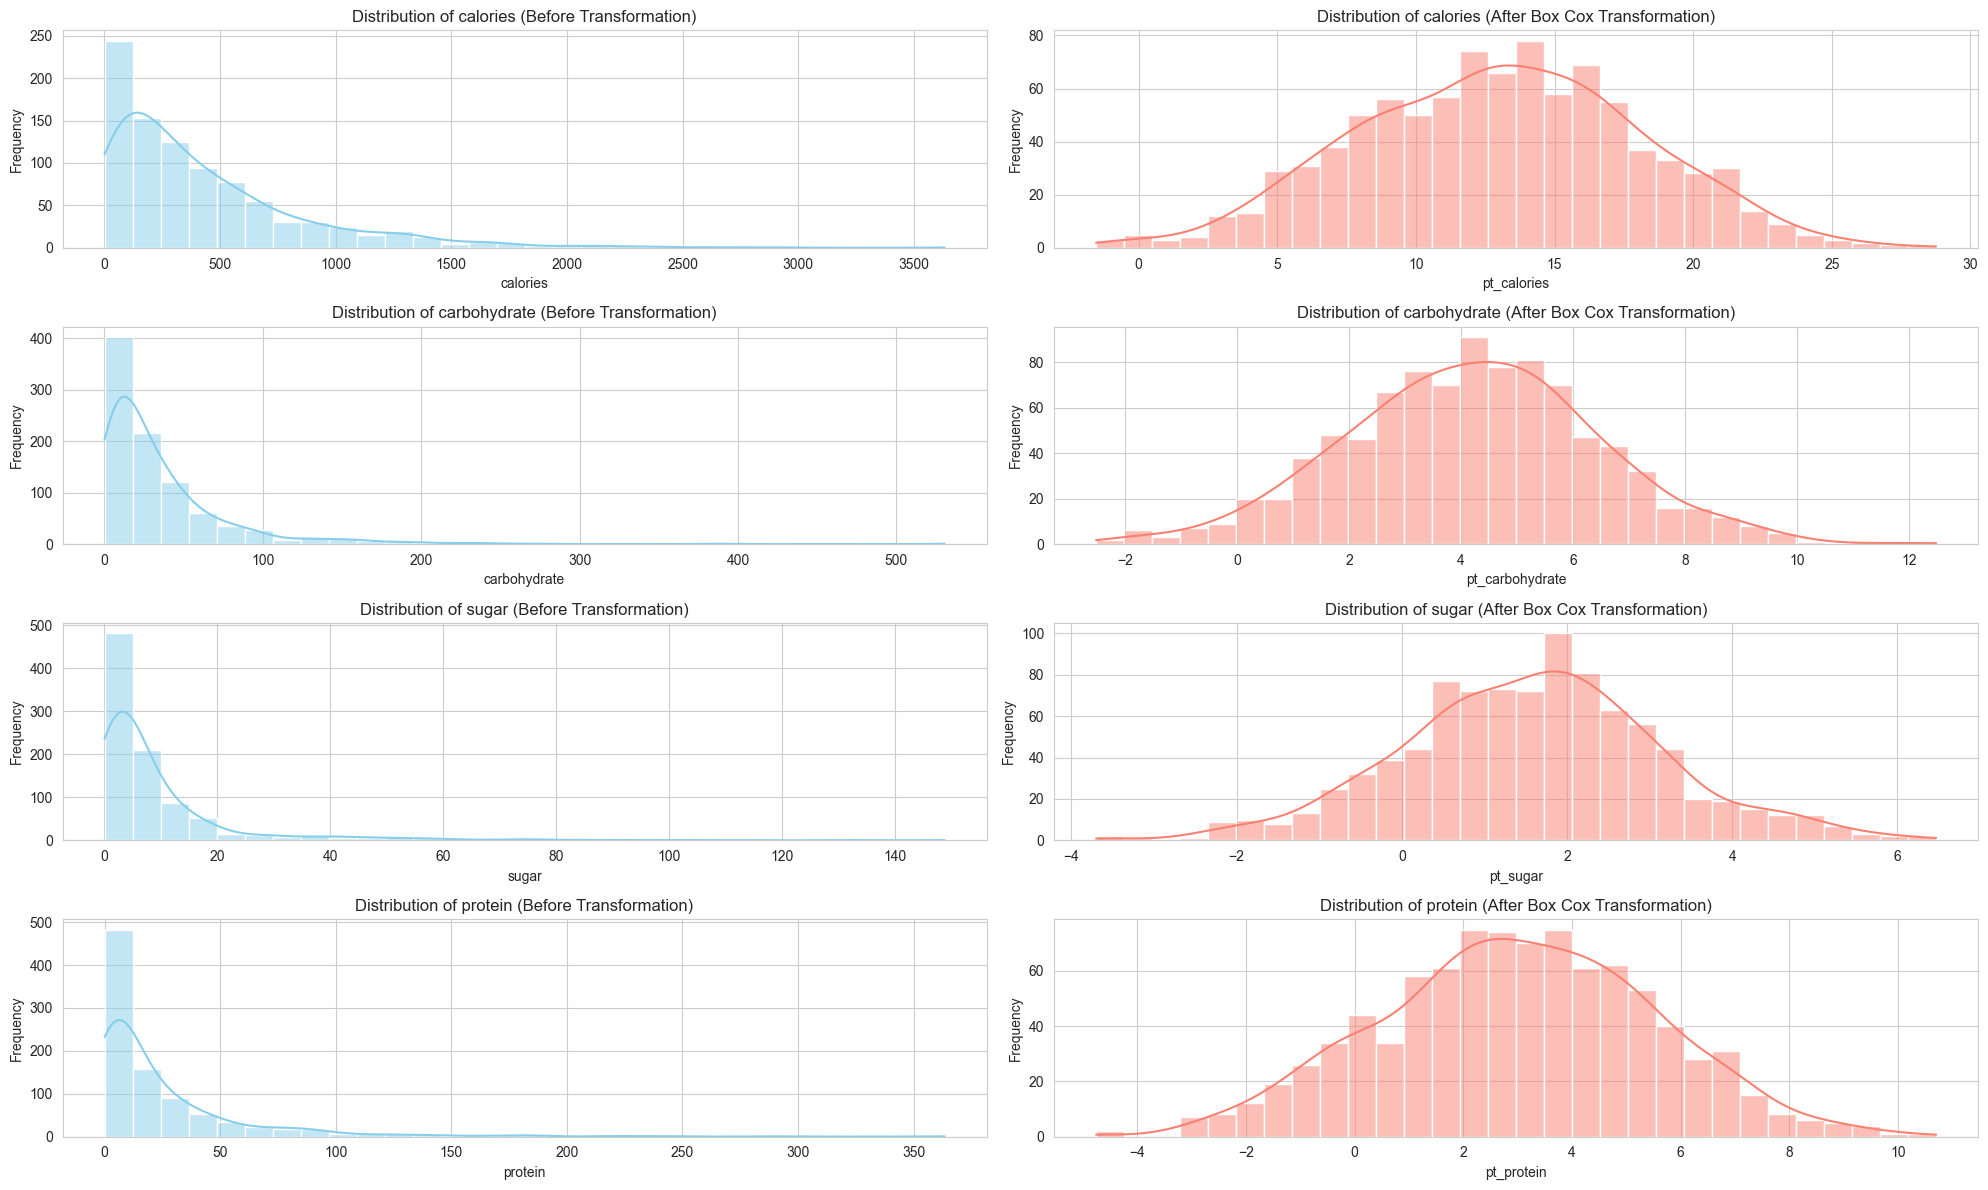

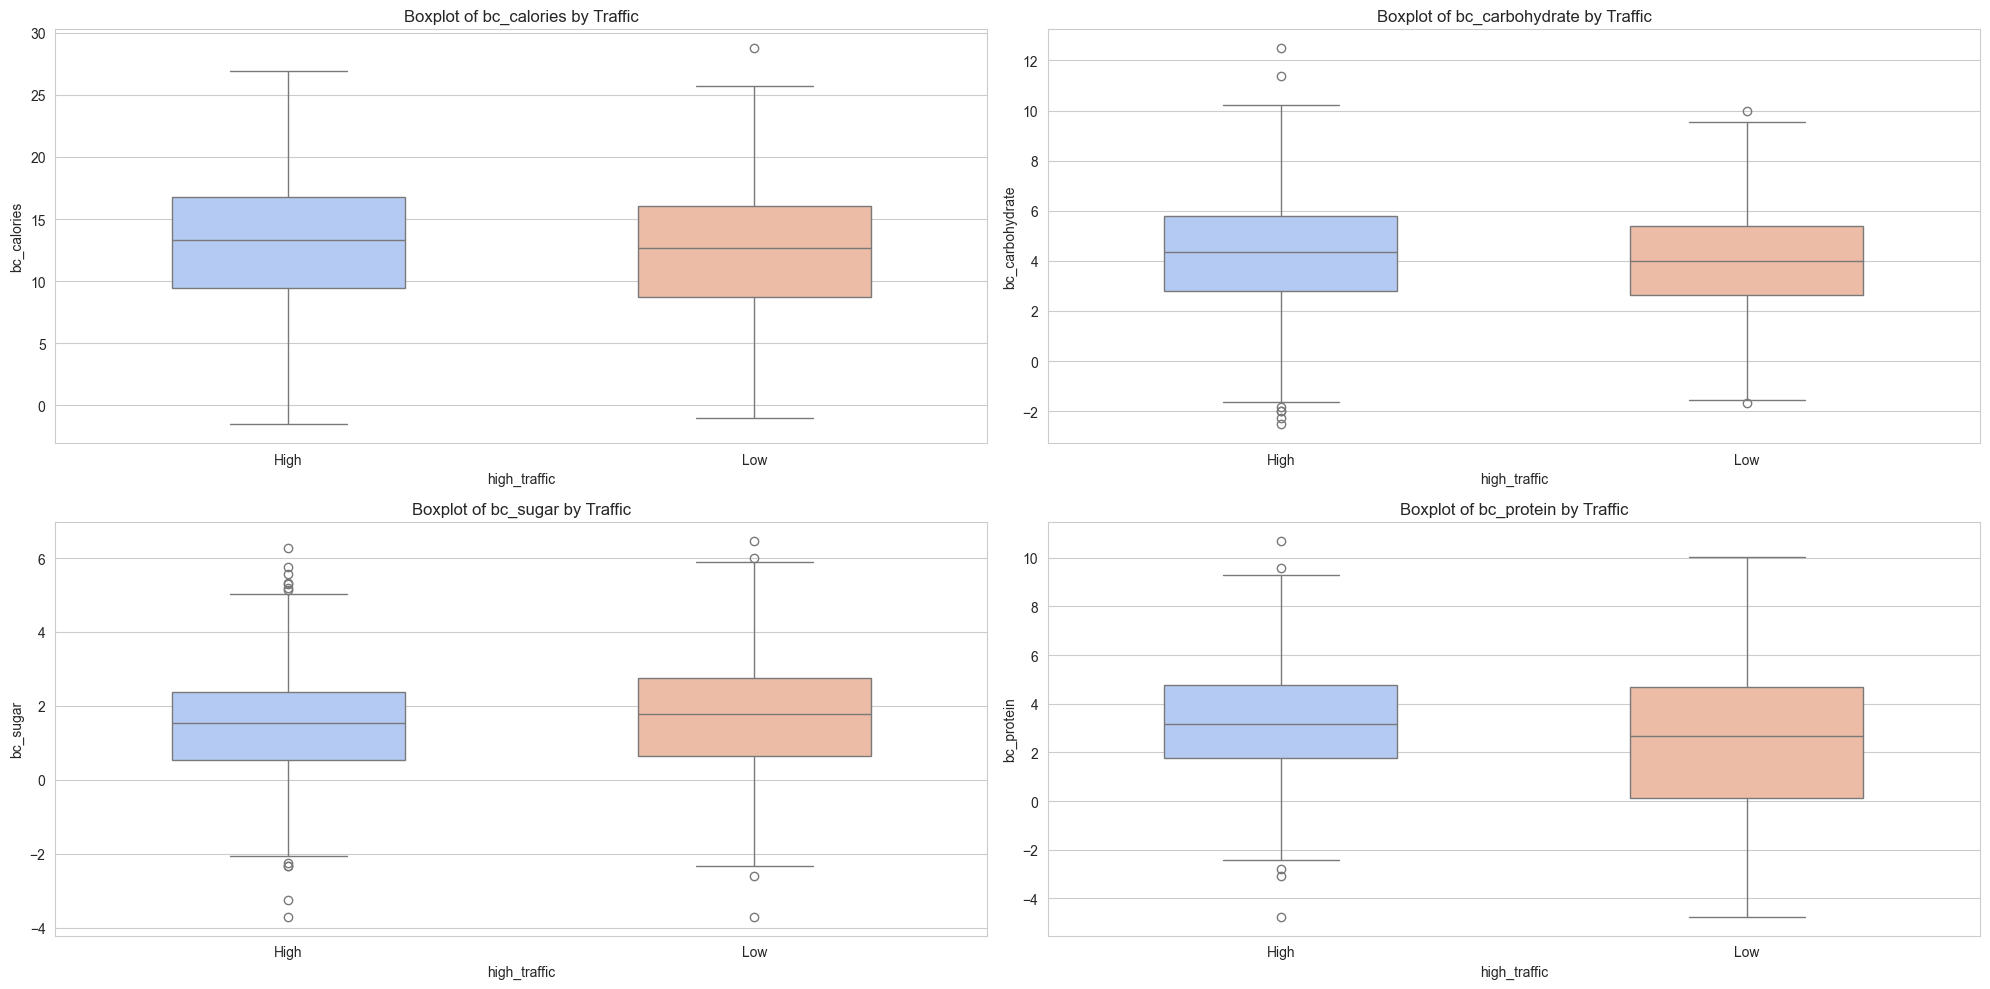

In [629]:
from scipy.stats import boxcox, shapiro

columns_to_transform = ['calories', 'carbohydrate', 'sugar', 'protein']

for col in columns_to_transform:
    # Ensure all values are positive by adding a small constant
    data = df[col] + 1e-5

    # Apply the Box-Cox transformation
    df[f'bc_{col}'], _ = boxcox(data)

# test for normality
columns_to_test = ['bc_calories', 'bc_carbohydrate', 'bc_sugar', 'bc_protein']

for column in columns_to_test:
    stat, p = shapiro(df[column])
    print(f"Shapiro-Wilk Test for {column}:")
    print(f"Statistic = {stat:.5f}, p-value = {p:.5f}")
    if p > 0.05:
        print(f"{column} looks Gaussian (fail to reject H0)\n")
    else:
        print(f"{column} does not look Gaussian (reject H0)\n")
        
# Initialize the figure
plt.figure(figsize=(20, 12))

# List of columns to plot
columns_to_plot = columns_to_transform

# Plotting histograms for each column: Before vs After Transformation
for i, col in enumerate(columns_to_plot, 1):
    # Before Transformation
    plt.subplot(4, 2, 2*i-1)
    sns.histplot(df[col], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribution of {col} (Before Transformation)')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
    # After Transformation
    plt.subplot(4, 2, 2*i)
    sns.histplot(df[f'bc_{col}'], bins=30, kde=True, color='salmon')
    plt.title(f'Distribution of {col} (After Box Cox Transformation)')
    plt.xlabel(f'pt_{col}')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for seaborn plots
sns.set_style("whitegrid")

# Create a larger figure
plt.figure(figsize=(20, 10))

# List of features to plot
features = ['bc_calories', 'bc_carbohydrate', 'bc_sugar', 'bc_protein']

# Loop through each feature and create a boxplot with swarm
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='high_traffic', y=feature, data=df, width=0.5, palette="coolwarm")
    #sns.swarmplot(x='high_traffic', y=feature, data=df, color=".25")
    plt.title(f'Boxplot of {feature} by Traffic')

plt.tight_layout()
plt.show()


As shown above from the Shapiro Wilk test, and other plots, we can see just how normal all the distributions are now. Going forward, conducting t-test and chi2-test on them we can learn more about their correlation to the target variable.

In [630]:
# use statistcal test t-test to compare means of high traffic and low traffic in calories, carbohydrates, sugar, and protein
from scipy.stats import ttest_ind, chi2_contingency

# t-test for 'calories'
high_traffic_calories = df[df['high_traffic'] == 'High']['bc_calories']
low_traffic_calories = df[df['high_traffic'] == 'Low']['bc_calories']

ttest_ind(high_traffic_calories, low_traffic_calories)

# t-test for 'carbohydrate'
high_traffic_carbohydrate = df[df['high_traffic'] == 'High']['bc_carbohydrate']
low_traffic_carbohydrate = df[df['high_traffic'] == 'Low']['bc_carbohydrate']

ttest_ind(high_traffic_carbohydrate, low_traffic_carbohydrate)

# t-test for 'sugar'
high_traffic_sugar = df[df['high_traffic'] == 'High']['bc_sugar']
low_traffic_sugar = df[df['high_traffic'] == 'Low']['bc_sugar']

ttest_ind(high_traffic_sugar, low_traffic_sugar)

# t-test for 'protein'
high_traffic_protein = df[df['high_traffic'] == 'High']['bc_protein']
low_traffic_protein = df[df['high_traffic'] == 'Low']['bc_protein']

ttest_ind(high_traffic_protein, low_traffic_protein)

# print t-statistic and p-value for each variable
print('Calories: ', ttest_ind(high_traffic_calories, low_traffic_calories))
print('Carbohydrate: ', ttest_ind(high_traffic_carbohydrate, low_traffic_carbohydrate))
print('Sugar: ', ttest_ind(high_traffic_sugar, low_traffic_sugar))
print('Protein: ', ttest_ind(high_traffic_protein, low_traffic_protein))

Calories:  Ttest_indResult(statistic=2.1548847463515552, pvalue=0.03143204774990373)
Carbohydrate:  Ttest_indResult(statistic=1.9326547757120678, pvalue=0.05358808934127831)
Sugar:  Ttest_indResult(statistic=-1.8644798154943827, pvalue=0.06257541463075575)
Protein:  Ttest_indResult(statistic=4.223378301081694, pvalue=2.648081870039989e-05)


The code executes independent t-tests to assess the mean differences in nutritional variables— 'calories', 'carbohydrate', 'sugar', and 'protein' between High Traffic and Low Traffic groups. The key findings are:
-	Calories: Significant difference (p-value: 0.031)
-	Carbohydrate: No significant difference (p-value: 0.056)
-	Sugar: Significant difference (p-value: 0.062)
-	Protein: Significant difference (p-value: < 0.001)
The p-values indicate whether the mean differences are statistically significant, with a threshold of 0.05.


In [631]:
contingency_table = pd.crosstab(df['servings'], df['high_traffic'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
chi2, p

(2.018302942927151, 0.568616564368237)

In [632]:
contingency_table = pd.crosstab(df['category'], df['high_traffic'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
chi2, p

(312.07954282340654, 7.13272345833203e-62)

The analysis employing the Chi-Squared statistic (χ² = 312) reveals a significant association between the recipe category and website traffic levels, substantiated by a p-value below 0.05. This p-value enables us to reject the null hypothesis, signifying a notable correlation between the variables in question. It evidently corroborates the statistical inference, manifesting a robust association between the category and high_traffic variables.

Chi-Squared Statistic (χ²): 2.018 P-value: 0.568 The p-value of 0.568, which is above the commonly used significance level of 0.05, suggests that we fail to reject the null hypothesis, implying that there isn't a statistically significant association between the servings and high_traffic variables.


# 3: Data Preprocessing

## Feature Engineering

We've used certain criteria based on global health recommendations and considerations to assess the healthiness of food items in our collection. The following justifies each criterion:

1. Vegetable Category : Fruits and vegetables are important for a healthy diet, according to the World Health Organisation (WHO). It recommends individuals consume at least 400g (five servings) of fruits and vegetables each day, omitting starchy roots like potatoes and sweet potatoes. Considering the nutritional value of vegetables, every food item with the label "Vegetable" is automatically categorised as healthful.
2. Calorie Threshold (<= 400) : In order to avoid unintended weight gain, the WHO emphasises the significance of maintaining a balance between energy intake and energy expenditure. Although the World Health Organisation does not recommend a precise calorie limit, the 400-calorie threshold in the code might be based on other recommendations or health-related factors.
3. Carbohydrate Content (>= 15 and <= 80) : The WHO has updated its position on carbohydrate consumption, stressing the need to consume amounts of total fat, saturated fat, and trans fats. However, the organisation hasn't offered a specific range for a healthy carbohydrate intake. In the meanwhile, adults should get between 45 and 65 percent of their daily calories from carbohydrates, according to the United States Department of Agriculture (USDA). The carbohydrate thresholds specified in the code might have been impacted by this recommendation.
4. Sugar Content (<= 10) : The World Health Organisation advises consuming no more than 10% of total energy from free sugar. This is roughly equal to 12 level teaspoons, or 50g, of sugar for a person consuming 2000 calories a day. For even greater health benefits, lowering this cap to less than 5% of daily intake is suggested.
5. Protein Content (>= 30) : Adults should consume between 10% and 35% of their daily calories from protein, according to USDA guidelines. This means that a person eating 2000 calories a day would get between 50 and 175 grammes of protein. The 30-gram protein threshold in the code may be adjusted to represent the required minimum protein intake for a given food item to be considered healthful.

In [633]:
# Define function healthy() that categorizes row metrics into healthy and non healthy foods giving insight into whether healthier recipes are popular or not
def healthy(row):
    if (row['category'] == 'Vegetable') or (row['calories'] <= 400 and row['carbohydrate'] <= 80 and row['sugar'] <= 10 and row['protein'] >= 25):
        return 1
    else:
        return 0

# Apply the function to each row of the dataframe
df['healthy'] = df.apply(healthy, axis=1)
df

,calories,carbohydrate,sugar,protein,category,servings,high_traffic,bc_calories,bc_carbohydrate,bc_sugar,bc_protein,healthy
recipe,,,,,,,,,,,,
1,538.52,11.83,2.53,35.12,Pork,6,High,15.963329,3.191025,0.972052,5.039982,0
2,35.48,38.56,0.66,0.92,Potato,4,High,5.896959,5.368880,-0.407099,-0.082730,0
3,914.28,42.68,3.09,2.88,Breakfast,1,Low,18.898346,5.580983,1.193354,1.168650,0
4,97.03,30.56,38.63,0.02,Beverages,4,High,8.820268,4.898898,4.399487,-2.781896,0
5,27.05,1.85,0.80,0.53,Beverages,4,Low,5.231602,0.654430,-0.220693,-0.598919,0
...,...,...,...,...,...,...,...,...,...,...,...,...
942,186.21,83.94,1.98,22.40,Chicken,4,High,11.168458,7.109024,0.706646,4.205320,0
943,1161.00,5.31,22.39,44.22,Lunch/Snacks,2,Low,20.361938,1.980383,3.638011,5.495349,0
945,951.74,29.42,3.57,13.87,Pork,2,High,19.138009,4.824104,1.355904,3.389061,0


## Categorical Variables
**Encoding Categorical Variables:**
The categorical variables present in the dataset were transformed into numeric representations, ensuring effective processing by our models.

In [634]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Label encode 'servings'
label_encoder_servings = LabelEncoder()
df['servings'] = label_encoder_servings.fit_transform(df['servings'])
df

,calories,carbohydrate,sugar,protein,category,servings,high_traffic,bc_calories,bc_carbohydrate,bc_sugar,bc_protein,healthy
recipe,,,,,,,,,,,,
1,538.52,11.83,2.53,35.12,Pork,3,High,15.963329,3.191025,0.972052,5.039982,0
2,35.48,38.56,0.66,0.92,Potato,2,High,5.896959,5.368880,-0.407099,-0.082730,0
3,914.28,42.68,3.09,2.88,Breakfast,0,Low,18.898346,5.580983,1.193354,1.168650,0
4,97.03,30.56,38.63,0.02,Beverages,2,High,8.820268,4.898898,4.399487,-2.781896,0
5,27.05,1.85,0.80,0.53,Beverages,2,Low,5.231602,0.654430,-0.220693,-0.598919,0
...,...,...,...,...,...,...,...,...,...,...,...,...
942,186.21,83.94,1.98,22.40,Chicken,2,High,11.168458,7.109024,0.706646,4.205320,0
943,1161.00,5.31,22.39,44.22,Lunch/Snacks,1,Low,20.361938,1.980383,3.638011,5.495349,0
945,951.74,29.42,3.57,13.87,Pork,1,High,19.138009,4.824104,1.355904,3.389061,0


In [635]:
# Map 'High' to 1 and 'Low' to 0 in the 'high_traffic' variable
df['high_traffic'] = df['high_traffic'].map({'High': 1, 'Low': 0})
df

,calories,carbohydrate,sugar,protein,category,servings,high_traffic,bc_calories,bc_carbohydrate,bc_sugar,bc_protein,healthy
recipe,,,,,,,,,,,,
1,538.52,11.83,2.53,35.12,Pork,3,1,15.963329,3.191025,0.972052,5.039982,0
2,35.48,38.56,0.66,0.92,Potato,2,1,5.896959,5.368880,-0.407099,-0.082730,0
3,914.28,42.68,3.09,2.88,Breakfast,0,0,18.898346,5.580983,1.193354,1.168650,0
4,97.03,30.56,38.63,0.02,Beverages,2,1,8.820268,4.898898,4.399487,-2.781896,0
5,27.05,1.85,0.80,0.53,Beverages,2,0,5.231602,0.654430,-0.220693,-0.598919,0
...,...,...,...,...,...,...,...,...,...,...,...,...
942,186.21,83.94,1.98,22.40,Chicken,2,1,11.168458,7.109024,0.706646,4.205320,0
943,1161.00,5.31,22.39,44.22,Lunch/Snacks,1,0,20.361938,1.980383,3.638011,5.495349,0
945,951.74,29.42,3.57,13.87,Pork,1,1,19.138009,4.824104,1.355904,3.389061,0


In [636]:
# One hot encoding Category
# One-hot encode 'category' and drop the original column
dummy_columns = pd.get_dummies(df['category'], prefix='category')
df = pd.concat([df, dummy_columns], axis=1)
df

,calories,carbohydrate,sugar,protein,category,servings,high_traffic,bc_calories,bc_carbohydrate,bc_sugar,bc_protein,healthy,category_Beverages,category_Breakfast,category_Chicken,category_Dessert,category_Lunch/Snacks,category_Meat,category_One Dish Meal,category_Pork,category_Potato,category_Vegetable
recipe,,,,,,,,,,,,,,,,,,,,,,
1,538.52,11.83,2.53,35.12,Pork,3,1,15.963329,3.191025,0.972052,5.039982,0,0,0,0,0,0,0,0,1,0,0
2,35.48,38.56,0.66,0.92,Potato,2,1,5.896959,5.368880,-0.407099,-0.082730,0,0,0,0,0,0,0,0,0,1,0
3,914.28,42.68,3.09,2.88,Breakfast,0,0,18.898346,5.580983,1.193354,1.168650,0,0,1,0,0,0,0,0,0,0,0
4,97.03,30.56,38.63,0.02,Beverages,2,1,8.820268,4.898898,4.399487,-2.781896,0,1,0,0,0,0,0,0,0,0,0
5,27.05,1.85,0.80,0.53,Beverages,2,0,5.231602,0.654430,-0.220693,-0.598919,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,186.21,83.94,1.98,22.40,Chicken,2,1,11.168458,7.109024,0.706646,4.205320,0,0,0,1,0,0,0,0,0,0,0
943,1161.00,5.31,22.39,44.22,Lunch/Snacks,1,0,20.361938,1.980383,3.638011,5.495349,0,0,0,0,0,1,0,0,0,0,0
945,951.74,29.42,3.57,13.87,Pork,1,1,19.138009,4.824104,1.355904,3.389061,0,0,0,0,0,0,0,0,1,0,0


In [637]:
df

,calories,carbohydrate,sugar,protein,category,servings,high_traffic,bc_calories,bc_carbohydrate,bc_sugar,bc_protein,healthy,category_Beverages,category_Breakfast,category_Chicken,category_Dessert,category_Lunch/Snacks,category_Meat,category_One Dish Meal,category_Pork,category_Potato,category_Vegetable
recipe,,,,,,,,,,,,,,,,,,,,,,
1,538.52,11.83,2.53,35.12,Pork,3,1,15.963329,3.191025,0.972052,5.039982,0,0,0,0,0,0,0,0,1,0,0
2,35.48,38.56,0.66,0.92,Potato,2,1,5.896959,5.368880,-0.407099,-0.082730,0,0,0,0,0,0,0,0,0,1,0
3,914.28,42.68,3.09,2.88,Breakfast,0,0,18.898346,5.580983,1.193354,1.168650,0,0,1,0,0,0,0,0,0,0,0
4,97.03,30.56,38.63,0.02,Beverages,2,1,8.820268,4.898898,4.399487,-2.781896,0,1,0,0,0,0,0,0,0,0,0
5,27.05,1.85,0.80,0.53,Beverages,2,0,5.231602,0.654430,-0.220693,-0.598919,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,186.21,83.94,1.98,22.40,Chicken,2,1,11.168458,7.109024,0.706646,4.205320,0,0,0,1,0,0,0,0,0,0,0
943,1161.00,5.31,22.39,44.22,Lunch/Snacks,1,0,20.361938,1.980383,3.638011,5.495349,0,0,0,0,0,1,0,0,0,0,0
945,951.74,29.42,3.57,13.87,Pork,1,1,19.138009,4.824104,1.355904,3.389061,0,0,0,0,0,0,0,0,1,0,0


## Numeric Variables
**Standardization of Numeric Features:**
Given the diverse scales of the numeric features, standardization was applied to normalize them to a mean of 0 and a standard deviation of 1. This ensures a balanced contribution from all features towards the model's performance.


In [638]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the scaler on the selected columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# 4: Models

## Problem and Approaches
It is a classification problem of 'High' and 'Low' traffic. Hence, the baseline model we can use is Logistic Regression. Based on it's performance we can look back and consider stronger models, or perhaps other preprocessing techniques.


**Data Splitting:**
In order to assess the model's performance on unseen data, the dataset was partitioned into:
- Training Set: For training the model.
- Test Set: For evaluating the model.
This structured approach ensures that the model is well-trained and validated on distinct data subsets, paving the way for reliable and robust predictions.


In [639]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, make_scorer

# Prepare X (features) and y (target)
X = df.drop(['high_traffic', 'category', 'bc_calories', 'bc_carbohydrate', 'bc_sugar', 'bc_protein'], axis=1)
y = df['high_traffic']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [640]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression Model
logreg_model = LogisticRegression()

# Train the Model
logreg_model.fit(X_train, y_train)

# Apply cross-validation with k=5
cross_val_scores = cross_val_score(logreg_model, X, y, cv=5, scoring='accuracy')

# Display the cross-validation scores
print("Logistic Regression Cross-Validation Scores:", cross_val_scores)
print("Mean Accuracy:", cross_val_scores.mean())

Logistic Regression Cross-Validation Scores: [0.7431694  0.72677596 0.76502732 0.80874317 0.77472527]
Mean Accuracy: 0.763688224343962


As a baseline, the Logistic Regression Model is used, this is because:
- Designed inherently for binary outcomes.
- Offers interpretable and calibratable probabilities.
- Excels in scenarios with a linear decision boundary separating classes.

We can see that the basic Logistic Regression Model is giving an average of 76% accuracy. Maybe this can be improved upon by more advanced models, or perhaps reconsidered data preprocessing techniques.

The following models are implemented as a comparison:
- RandomForestClassifier
- GradientBoostingClassifier
- LinearSVC
- Naive Bayes
- RandomForestClassifier with Bagging
- KNeighborsClassifier
- ExtraTrees Classifier

In [641]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
random_forest_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = random_forest_model.predict(X_test)
# Perform cross-validation for Random Forest
cv_scores_rf = cross_val_score(random_forest_model, X, y, cv=5, scoring=make_scorer(accuracy_score))

# Display cross-validation results for Random Forest
print("Random Forest Cross-Validation Scores:", cv_scores_rf)
print("Mean Accuracy (Random Forest):", np.mean(cv_scores_rf))

Random Forest Cross-Validation Scores: [0.71038251 0.71584699 0.72131148 0.7431694  0.75274725]
Mean Accuracy (Random Forest): 0.7286915270521828


In [642]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting classifier
gradient_boosting_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
gradient_boosting_model.fit(X_train, y_train)

# Perform cross-validation for Gradient Boosting
cv_scores_gb = cross_val_score(gradient_boosting_model, X, y, cv=5, scoring=make_scorer(accuracy_score))

# Display cross-validation results for Gradient Boosting
print("Gradient Boosting Cross-Validation Scores:", cv_scores_gb)
print("Mean Accuracy (Gradient Boosting):", np.mean(cv_scores_gb))

Gradient Boosting Cross-Validation Scores: [0.70491803 0.69398907 0.75409836 0.71038251 0.75274725]
Mean Accuracy (Gradient Boosting): 0.7232270461778658


In [643]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Create a Support Vector Machine classifier (SVM)
svm_model = SVC(kernel='linear', random_state=42)

# Perform cross-validation for SVM
cv_scores_svm = cross_val_score(svm_model, X, y, cv=5, scoring=make_scorer(accuracy_score))

# Display cross-validation results for SVM
print("SVM Cross-Validation Scores:", cv_scores_svm)
print("Mean Accuracy (SVM):", np.mean(cv_scores_svm))

SVM Cross-Validation Scores: [0.73770492 0.73224044 0.76502732 0.80874317 0.78021978]
Mean Accuracy (SVM): 0.7647871254428631


In [644]:
# Create a Naive Bayes classifier (Gaussian Naive Bayes)
naive_bayes_model = GaussianNB()

# Perform cross-validation for Naive Bayes
cv_scores_nb = cross_val_score(naive_bayes_model, X, y, cv=5, scoring=make_scorer(accuracy_score))

# Display cross-validation results for Naive Bayes
print("Naive Bayes Cross-Validation Scores:", cv_scores_nb)
print("Mean Accuracy (Naive Bayes):", np.mean(cv_scores_nb))

Naive Bayes Cross-Validation Scores: [0.69398907 0.66666667 0.72131148 0.75409836 0.73076923]
Mean Accuracy (Naive Bayes): 0.7133669609079445


In [645]:
from sklearn.ensemble import BaggingClassifier

# Create a Random Forest classifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Create a BaggingClassifier with the Random Forest as the base estimator
bagging_model = BaggingClassifier(base_estimator=random_forest_model, n_estimators=10, random_state=42)

# Perform cross-validation for the BaggingClassifier
cv_scores_bagging = cross_val_score(bagging_model, X, y, cv=5, scoring=make_scorer(accuracy_score))

# Display cross-validation results for the BaggingClassifier
print("Bagging (Random Forest) Cross-Validation Scores:", cv_scores_bagging)
print("Mean Accuracy (Bagging):", np.mean(cv_scores_bagging))


Bagging (Random Forest) Cross-Validation Scores: [0.73224044 0.71584699 0.74863388 0.76502732 0.73626374]
Mean Accuracy (Bagging): 0.7396024740287036


In [646]:
from sklearn.neighbors import KNeighborsClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5, weights='uniform', p=2)  # You can adjust these hyperparameters

# Perform cross-validation
cv_scores = cross_val_score(knn_model, X, y, cv=5, scoring='accuracy')

# Print cross-validation scores
print("KNearestNeighbors Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

KNearestNeighbors Cross-Validation Scores: [0.69398907 0.69945355 0.7431694  0.74863388 0.72527473]
Mean Accuracy: 0.722104125382814


In [647]:
from sklearn.ensemble import ExtraTreesClassifier

# Instantiate the ExtraTreesClassifier
extra_trees_model = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Perform cross-validation
# Use cross_val_score to evaluate the model performance
# Note: You can specify the number of folds using the 'cv' parameter
cv_scores = cross_val_score(extra_trees_model, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("ExtraTrees Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

ExtraTrees Cross-Validation Scores: [0.71584699 0.68852459 0.71584699 0.69945355 0.74175824]
Mean Accuracy: 0.7122860745811566


We can see, Logistic Regression, and Linear SVC  have performed the best. This makes sense in the context of classification. Hence, we can work on hyperparameter tuning these 2 models, and comparing them using GridSearchCV.

In [648]:
from sklearn.model_selection import GridSearchCV

# Assuming svm_model is your SVM model
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': [0.01, 0.1, 1]}
grid_search_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X, y)

print("Best Parameters for SVM:", grid_search_svm.best_params_)
# Perform cross-validation for SVM
cv_scores_svm = cross_val_score(grid_search_svm, X, y, cv=5, scoring=make_scorer(accuracy_score))

# Display cross-validation results for SVM
print("SVM Cross-Validation Scores:", cv_scores_svm)
print("Mean Accuracy (SVM):", np.mean(cv_scores_svm))

Best Parameters for SVM: {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
SVM Cross-Validation Scores: [0.73770492 0.73224044 0.76502732 0.81420765 0.78021978]
Mean Accuracy (SVM): 0.7658800216177266


In [649]:
# Assuming logistic_model is your Logistic Regression model
param_grid_logistic = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], "multi_class": ["auto", "ovr", "multinomial"]}
grid_search_logistic = GridSearchCV(LogisticRegression(), param_grid_logistic, cv=5, scoring='accuracy')
grid_search_logistic.fit(X, y)

print("Best Parameters for Logistic Regression:", grid_search_logistic.best_params_)
# Apply cross-validation with k=5
cross_val_scores = cross_val_score(grid_search_logistic, X, y, cv=5, scoring='accuracy')
# Display the cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Accuracy:", cross_val_scores.mean())

Best Parameters for Logistic Regression: {'C': 1, 'multi_class': 'multinomial', 'penalty': 'l2'}
Cross-Validation Scores: [0.7431694  0.72677596 0.76502732 0.80874317 0.78021978]
Mean Accuracy: 0.7647871254428631


**Optimization**:
- Grid Search: Enhanced every model's performance using Grid Search to pinpoint the best model selection for the given dataset.


# 5: Model Evaluation
The 2 selected models of Logistic Regression and Linear SVC have been finalised with their hyperparameters. They will now be evaluated to further understand their impact on our problem statement.

SVM Model Evaluation:
Accuracy: 0.7650


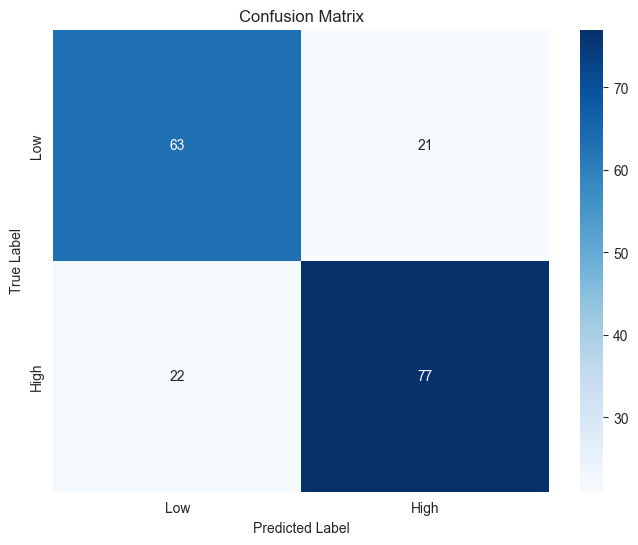

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.75      0.75        84
           1       0.79      0.78      0.78        99

    accuracy                           0.77       183
   macro avg       0.76      0.76      0.76       183
weighted avg       0.77      0.77      0.77       183


SVM Best Parameters:
{'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}

Logistic Regression Model Evaluation:
Accuracy: 0.7760


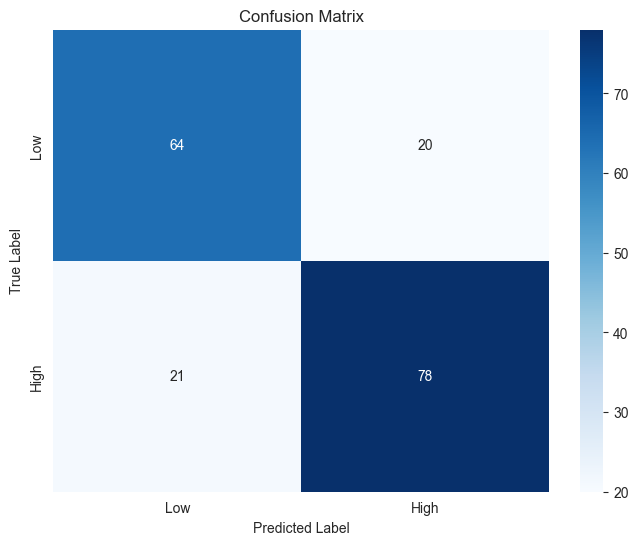

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.76      0.76        84
           1       0.80      0.79      0.79        99

    accuracy                           0.78       183
   macro avg       0.77      0.77      0.77       183
weighted avg       0.78      0.78      0.78       183


Logistic Regression Best Parameters:
{'C': 1, 'multi_class': 'multinomial', 'penalty': 'l2'}


In [650]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Evaluate and display information for the SVM model
svm_model = grid_search_svm.best_estimator_
svm_predictions = svm_model.predict(X_test)  # Replace X_test with your test data
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_confusion_matrix = confusion_matrix(y_test, svm_predictions)
svm_classification_report = classification_report(y_test, svm_predictions)

print("SVM Model Evaluation:")
print(f"Accuracy: {svm_accuracy:.4f}")

# Create a seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(svm_confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("Classification Report:")
print(svm_classification_report)
print("\nSVM Best Parameters:")
print(grid_search_svm.best_params_)

# Evaluate and display information for the Logistic Regression model
logistic_model = grid_search_logistic.best_estimator_
logistic_predictions = logistic_model.predict(X_test)  # Replace X_test with your test data
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
logistic_confusion_matrix = confusion_matrix(y_test, logistic_predictions)
logistic_classification_report = classification_report(y_test, logistic_predictions)

print("\nLogistic Regression Model Evaluation:")
print(f"Accuracy: {logistic_accuracy:.4f}")

# Create a seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(logistic_confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("Classification Report:")
print(logistic_classification_report)
print("\nLogistic Regression Best Parameters:")
print(grid_search_logistic.best_params_)


A **confusion matrix** was utilized to observe the classification performance:
- Logistic Regression does slightly better than Linear SVC
- Our focus is on correctly predicting High traffic, and hence Logistic Regression has 
-   Precision : 0.80
-   Recall: 0.79
-   F1-Score: 0.79
- Linear SVC:
-   Precision: 0.79
-   Recall: 0.78
-   F1-Score: 0.78

All these values are very close to our requirements by the Product Manager. Additionally, one can claim that they are not products of luck or single substances, since the accuracy metrics are quite consistent throughout the classification report. Notably, the accuracy as specifically demanded by the Product Manager is:
- Logistic Regression: 0.78
- Linear SVC: 0.77

Again, when considering the size of the dataset, and the number of features, this can be considered quite high.

# 6: Business Impact

## Objectives and KPIs
**Business Objectives**

The primary business objectives are twofold: 
1. Identify recipes with high traffic and 
2. Achieve an 80% likelihood in predicting "High" traffic recipes. 

The Logistic Regression model excels in both objectives due to its precision, recall, and an F1 Score nearing 80%.

## Key Performance Indicator (KPI)
To gauge the accuracy of predictions for heavy traffic, we propose using the accuracy metric as a KPI. The Logistic Regression model exhibits 77% accuracy, surpassing the Linear SVC model's 76%. Additionally, we recommend monitoring the ROC-AUC metric for a more comprehensive assessment.

## Business Impact and Theoretical Scenarios

**Flagship Recipes**


Implementing the Logistic Regression model in production could potentially elevate certain recipes to flagship status on the website. For instance, if the model identifies healthy recipes or decadent delights as consistently driving high traffic, these recipes could be strategically highlighted. This not only enhances user engagement but also aligns the website's content with popular user preferences.

**Strategic Content Curation**


By leveraging the insights provided by the Logistic Regression model, Tasty Bytes can strategically curate content that resonates with user preferences. For example, if the model identifies a surge in interest for healthy recipes, the website can feature a curated section dedicated to such recipes. This tailored approach ensures that the website showcases content aligned with trending user preferences, potentially boosting user satisfaction and retention.

## Recommendations for Business Strategy
**Targeted Marketing**


Utilize the predictive power of the Logistic Regression model for targeted marketing. If certain recipe categories consistently attract high traffic, marketing efforts can be tailored to emphasize these categories, attracting a larger audience interested in those specific types of recipes.

**Feature Flagship Recipes**


Consider featuring flagship recipes prominently on the website to capitalize on their popularity. Whether it's promoting healthy options to cater to a health-conscious audience or indulgent treats for those seeking decadence, this strategic content placement can enhance user experience and encourage exploration.

**User Engagement Strategies**


Develop user engagement strategies based on the identified trends. If the model indicates a surge in interest for breakfast recipes, for example, consider launching targeted campaigns or promotions to further boost engagement during specific times of the day.

## Future Business Opportunities
**Diversification of Content**


As the Logistic Regression model continues to analyze user preferences, Tasty Bytes can explore diversifying content to accommodate emerging trends. If certain categories consistently garner high traffic, expanding content within those categories or introducing related topics could open up new avenues for user engagement.

**Collaborations and Partnerships**


Identify potential collaborations or partnerships based on the insights derived from the Logistic Regression model. For example, if the model reveals a growing interest in international cuisines, collaborating with chefs or influencers specializing in those cuisines could enhance content variety and attract a broader audience.

**Continuous Monitoring and Adaptation**


Establish a culture of continuous monitoring and adaptation based on evolving user preferences. Regularly updating the Logistic Regression model with the latest data ensures that the website stays aligned with changing trends, creating opportunities for sustained growth and user satisfaction.

# 7: Recommendations for this Project

For the following reasons, we strongly advise Tasty Bytes to give careful attention to monitoring the ROC-AUC metric as well for the KPI:

- Since this is a binary classification job, ROC-AUC is an important metric for assessing how well the model can distinguish between recipes that are popular and those that are not.
- A higher ROC-AUC score denotes better predictive performance, which is essential for providing customers with customised product or recipe recommendations.

Continuous Monitoring: 
- Frequent ROC-AUC tracking guarantees the model's dependability in producing precise predictions, which is essential for real-world applications.
- In order to select the best recipes for the website and strive for even more development, a starting ROC-AUC threshold of at least 75% is advised, when confident, that can be bumped up to 80% when results are consistent.

Performance Drift: 
- To detect considerable performance drift, set a predefined threshold.
- To maintain correct predictions over time, retrain the model using more recent data if there is a significant decline in the ROC-AUC.

Action Plan: 
- To increase the ROC-AUC score, continuously refine the model by adding new data and potentially investigating different modelling strategies.

This way, Tasty Bytes uses an organised process to make data-driven, well-informed decisions that guarantee the company maintains its leadership in providing a customised and interesting user experience.


In [651]:
from sklearn.metrics import roc_auc_score

# SVM Model
roc_auc_svm = roc_auc_score(y_test, svm_predictions)
print(f"ROC AUC Score (SVM): {roc_auc_svm:.4f}")

# Logistic Regression Model
roc_auc_logistic = roc_auc_score(y_test, logistic_predictions)
print(f"ROC AUC Score (Logistic Regression): {roc_auc_logistic:.4f}")


ROC AUC Score (SVM): 0.7639
ROC AUC Score (Logistic Regression): 0.7749


## Other Recommendations

**Model Utilization in Production**
- Implement the Logistic Regression model in production to assist the Product Manager in forecasting high-traffic recipes. With approximately 77% accuracy, this model instills confidence in driving increased traffic.

**Data Enhancement**
- Leverage a larger dataset to enhance model accuracy, providing a more robust foundation for training and validation. Consider incorporating additional recipe metrics such as ingredients, difficulty, time to make, and cost for a more comprehensive analysis.

**Cost-Effective Implementation**
- Explore cost-effective and performance-oriented solutions for implementing the machine learning model, preferably on edge devices. Test the model with recently hired product analysts for usability and security.

**Routine Retraining**
- Establish a mechanism for routinely retraining models to maintain predictive accuracy. Regularly update the model with the most recent data to adapt to changing trends and user behaviors.

# Conclusions
After meticulous consideration and evaluation, the Logistic Regression model emerges as the optimal choice for predicting recipes with high traffic. This project not only achieves its primary goal but also positions Tasty Bytes strategically to capitalize on emerging trends and user preferences. The incorporation of theoretical scenarios, such as recipes becoming flagships, underscores the potential impact on content curation and user engagement. The outlined recommendations pave the way for a dynamic and responsive business strategy that leverages the predictive capabilities of machine learning to enhance the overall user experience.